**TASK**:
Calculate the bias and variance of a dataset that is not sampled yet, and then predict the degree of the best fit curve

# Header files included

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import numpy
import random
import pickle
import pandas
import matplotlib.pyplot as plt
%matplotlib inline

# Some global variables that can be used to check specific outputs

In [16]:
debug = 1  # 1 if you want to see the variable values during the program execution
graphing = 1  # 1 to see the necessary graphs

# STEP 1: LOADING THE DATASET AND VISUALISING IT

### Load the dataset:

In [17]:
#TODO: read dataset
#f = 
#data_set = 
f = open('Q2_data/X_train.pkl', 'rb')
X_train_data_sets= pickle.load(f)
f.close()

# Get y train dataset
f = open('Q2_data/Y_train.pkl', 'rb')
Y_train_data_sets = pickle.load(f)
f.close()

# Get x test dataset
f = open('Q2_data/X_test.pkl', 'rb')
xTest = pickle.load(f)
f.close()

# Get y test dataset
f = open('Q2_data/Fx_test.pkl', 'rb')
yTest = pickle.load(f)
f.close()

### Graphing the given dataset

In [18]:
# plot the data
X_train_data_sets.shape

(20, 400)

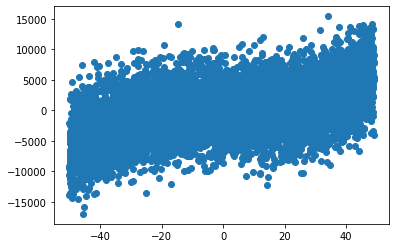

In [19]:
plt.scatter(X_train_data_sets,Y_train_data_sets)
plt.show()

## STEP 3: TRAINING A MODEL

## Plotting A Graph Of The Trained Polynomial Regression Model

TRAINING SET  0


<Figure size 432x288 with 0 Axes>

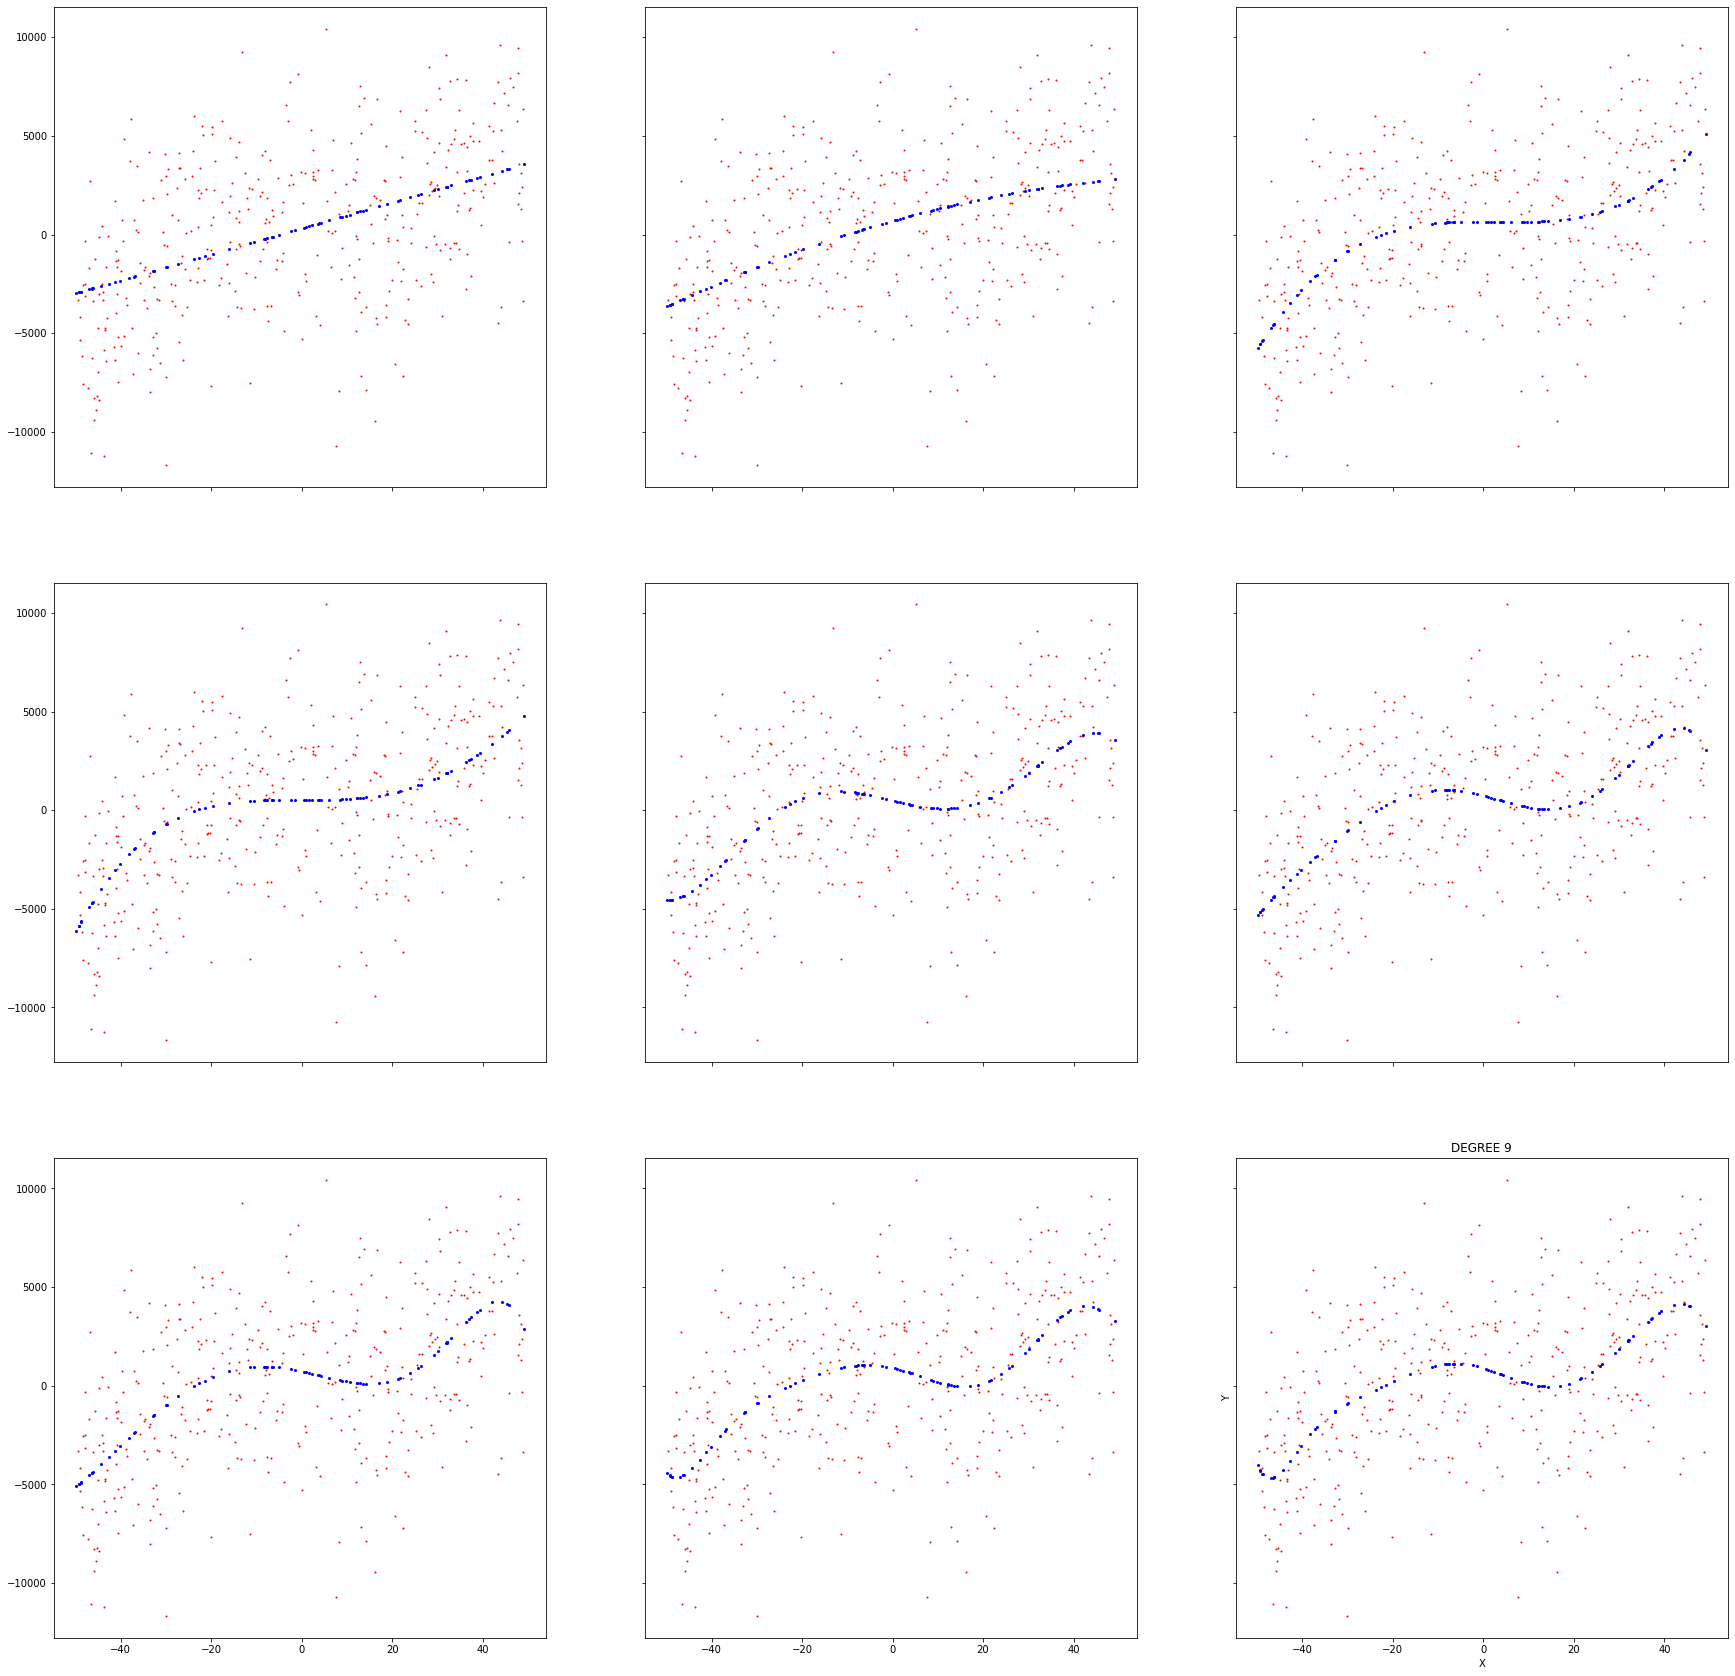

TRAINING SET  1


<Figure size 432x288 with 0 Axes>

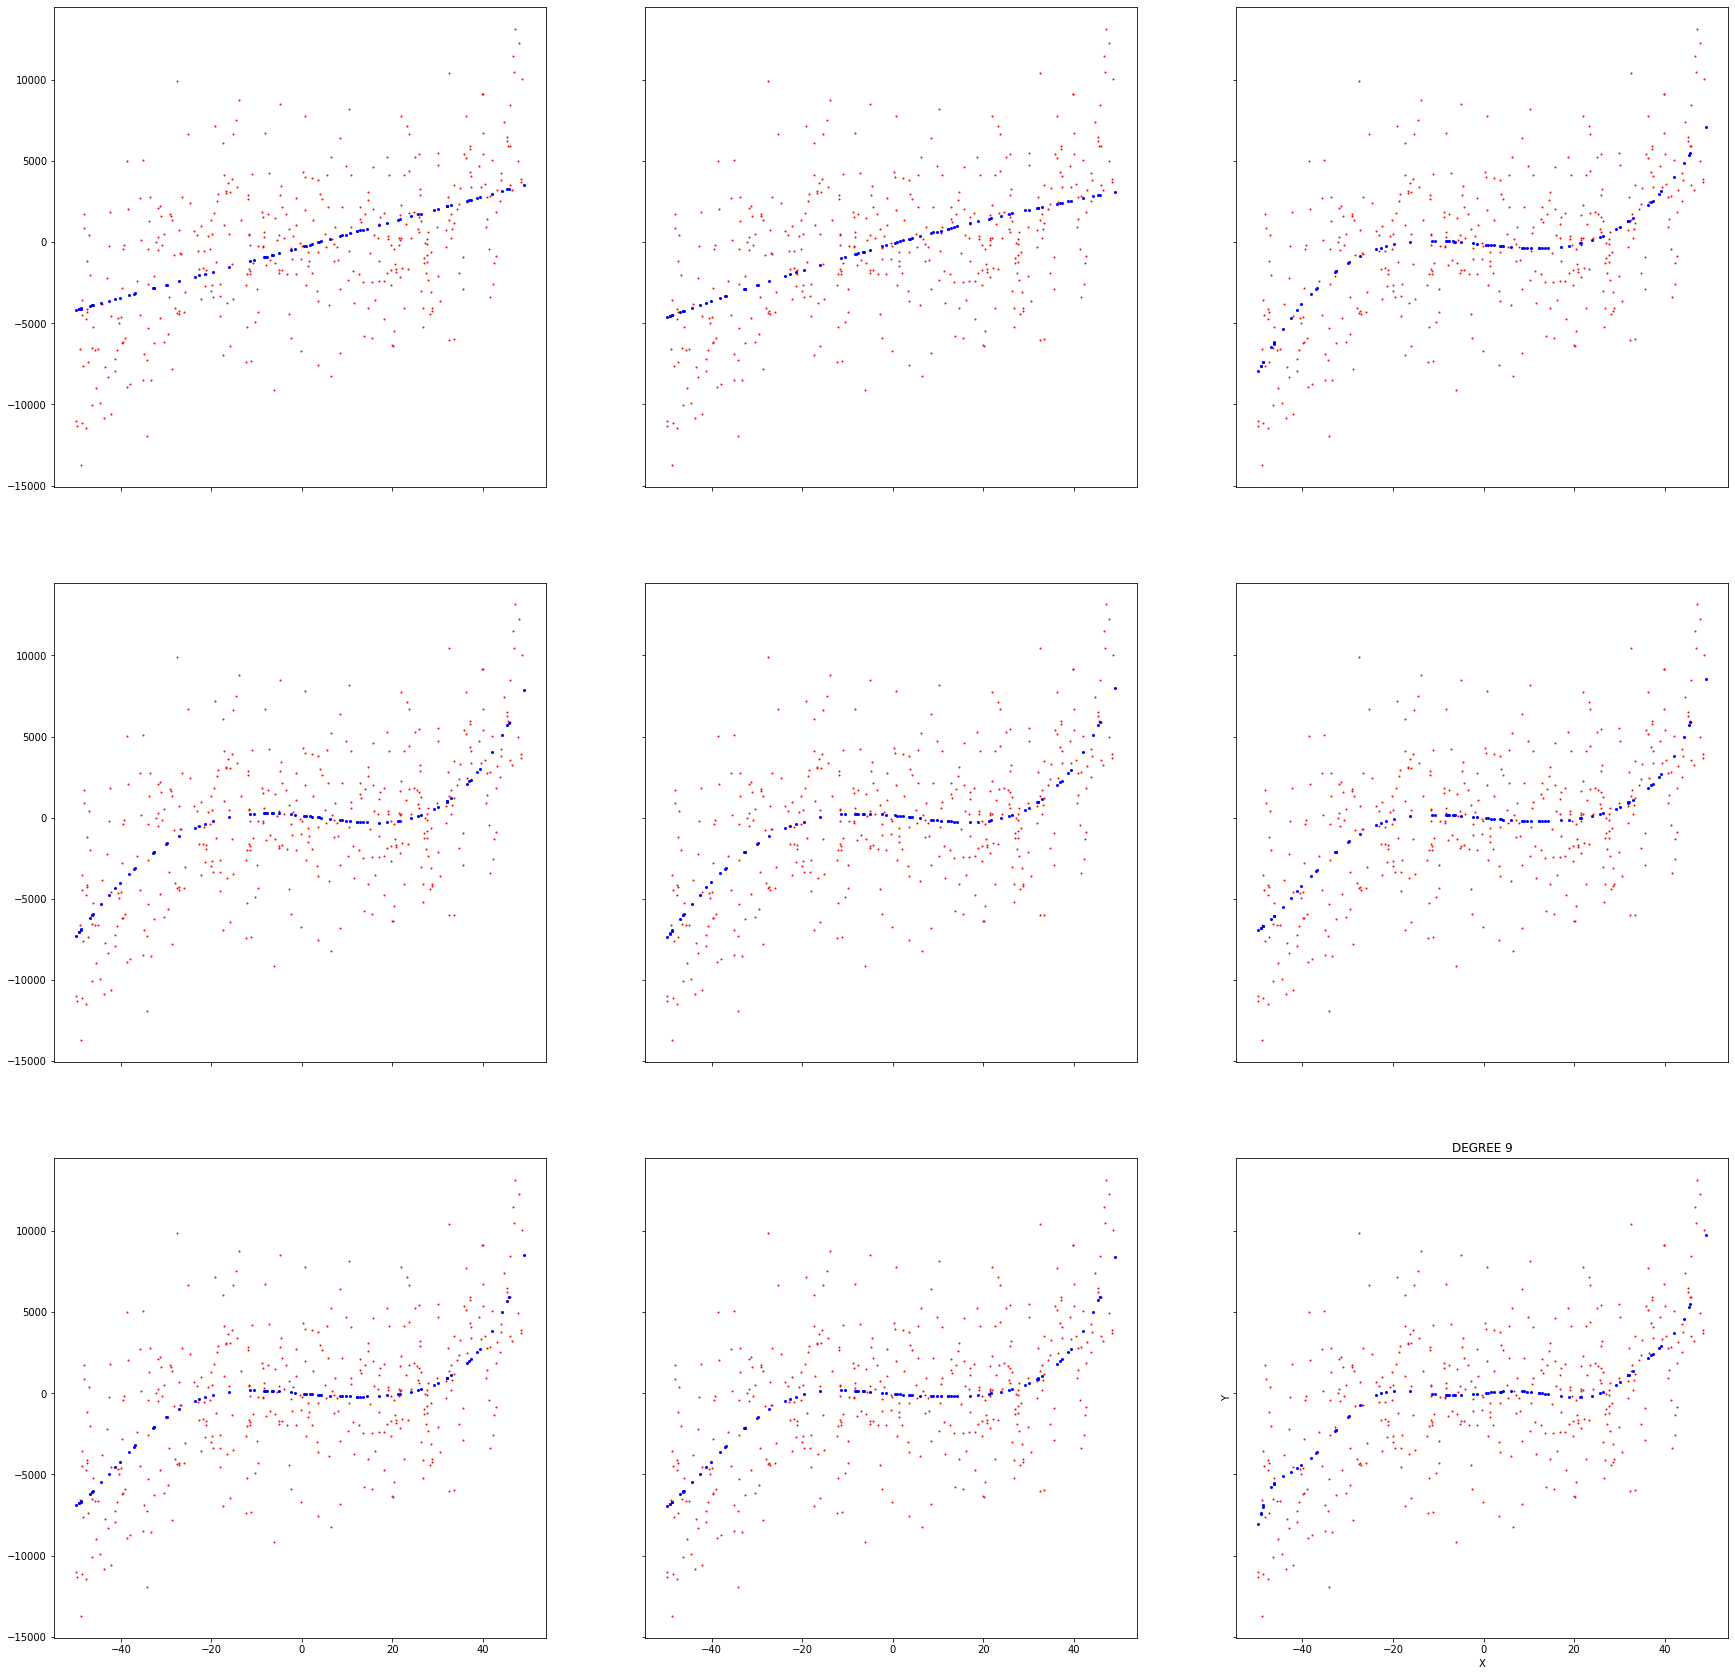

TRAINING SET  2


<Figure size 432x288 with 0 Axes>

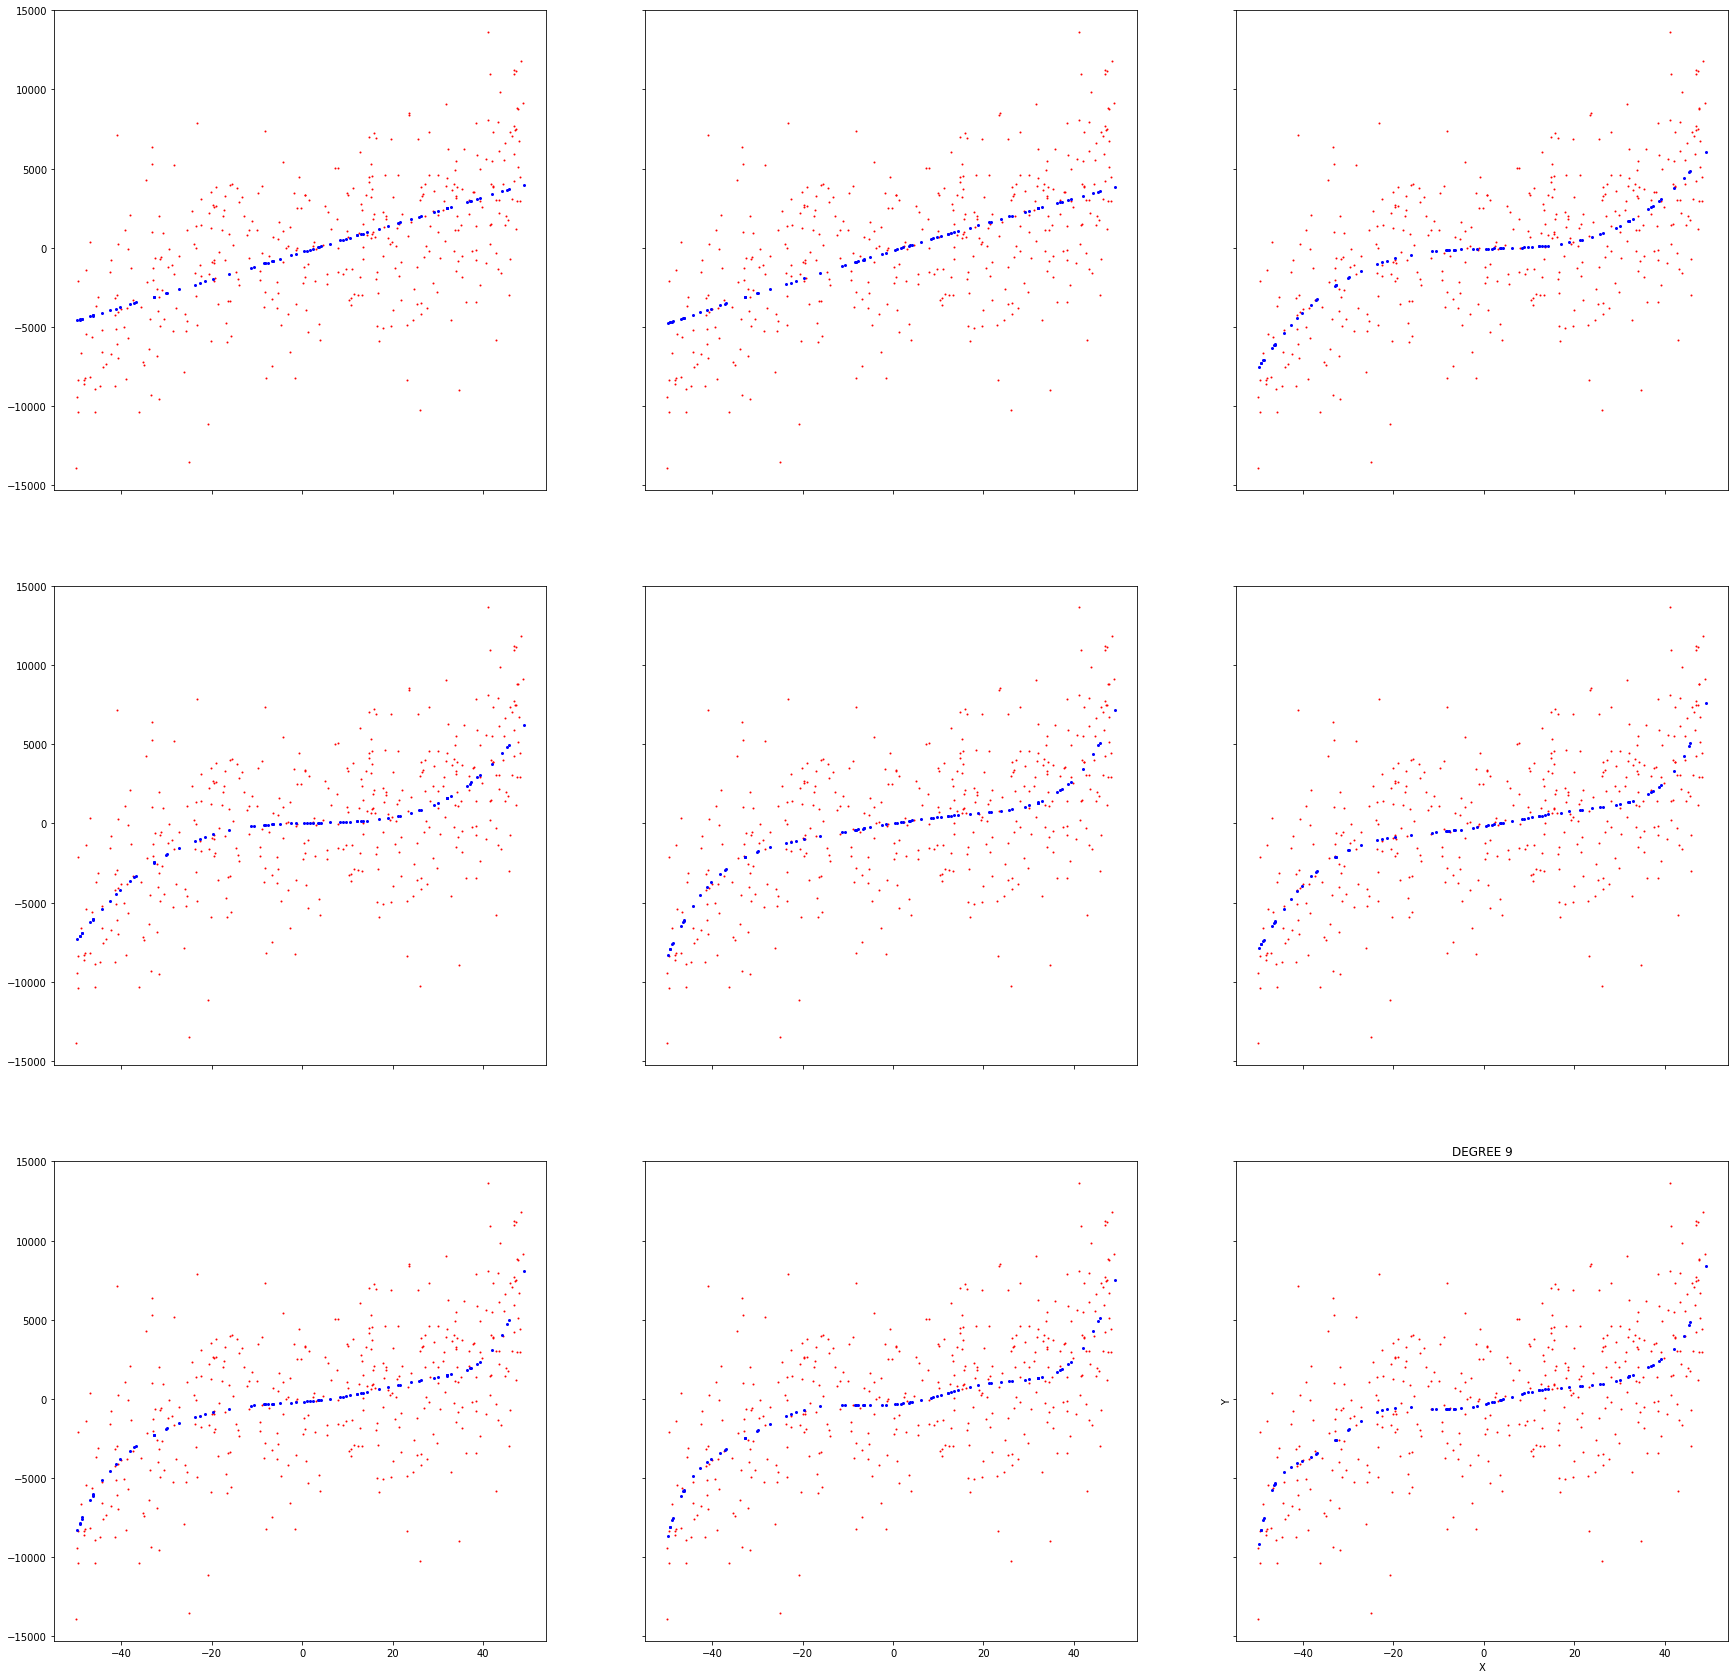

TRAINING SET  3


<Figure size 432x288 with 0 Axes>

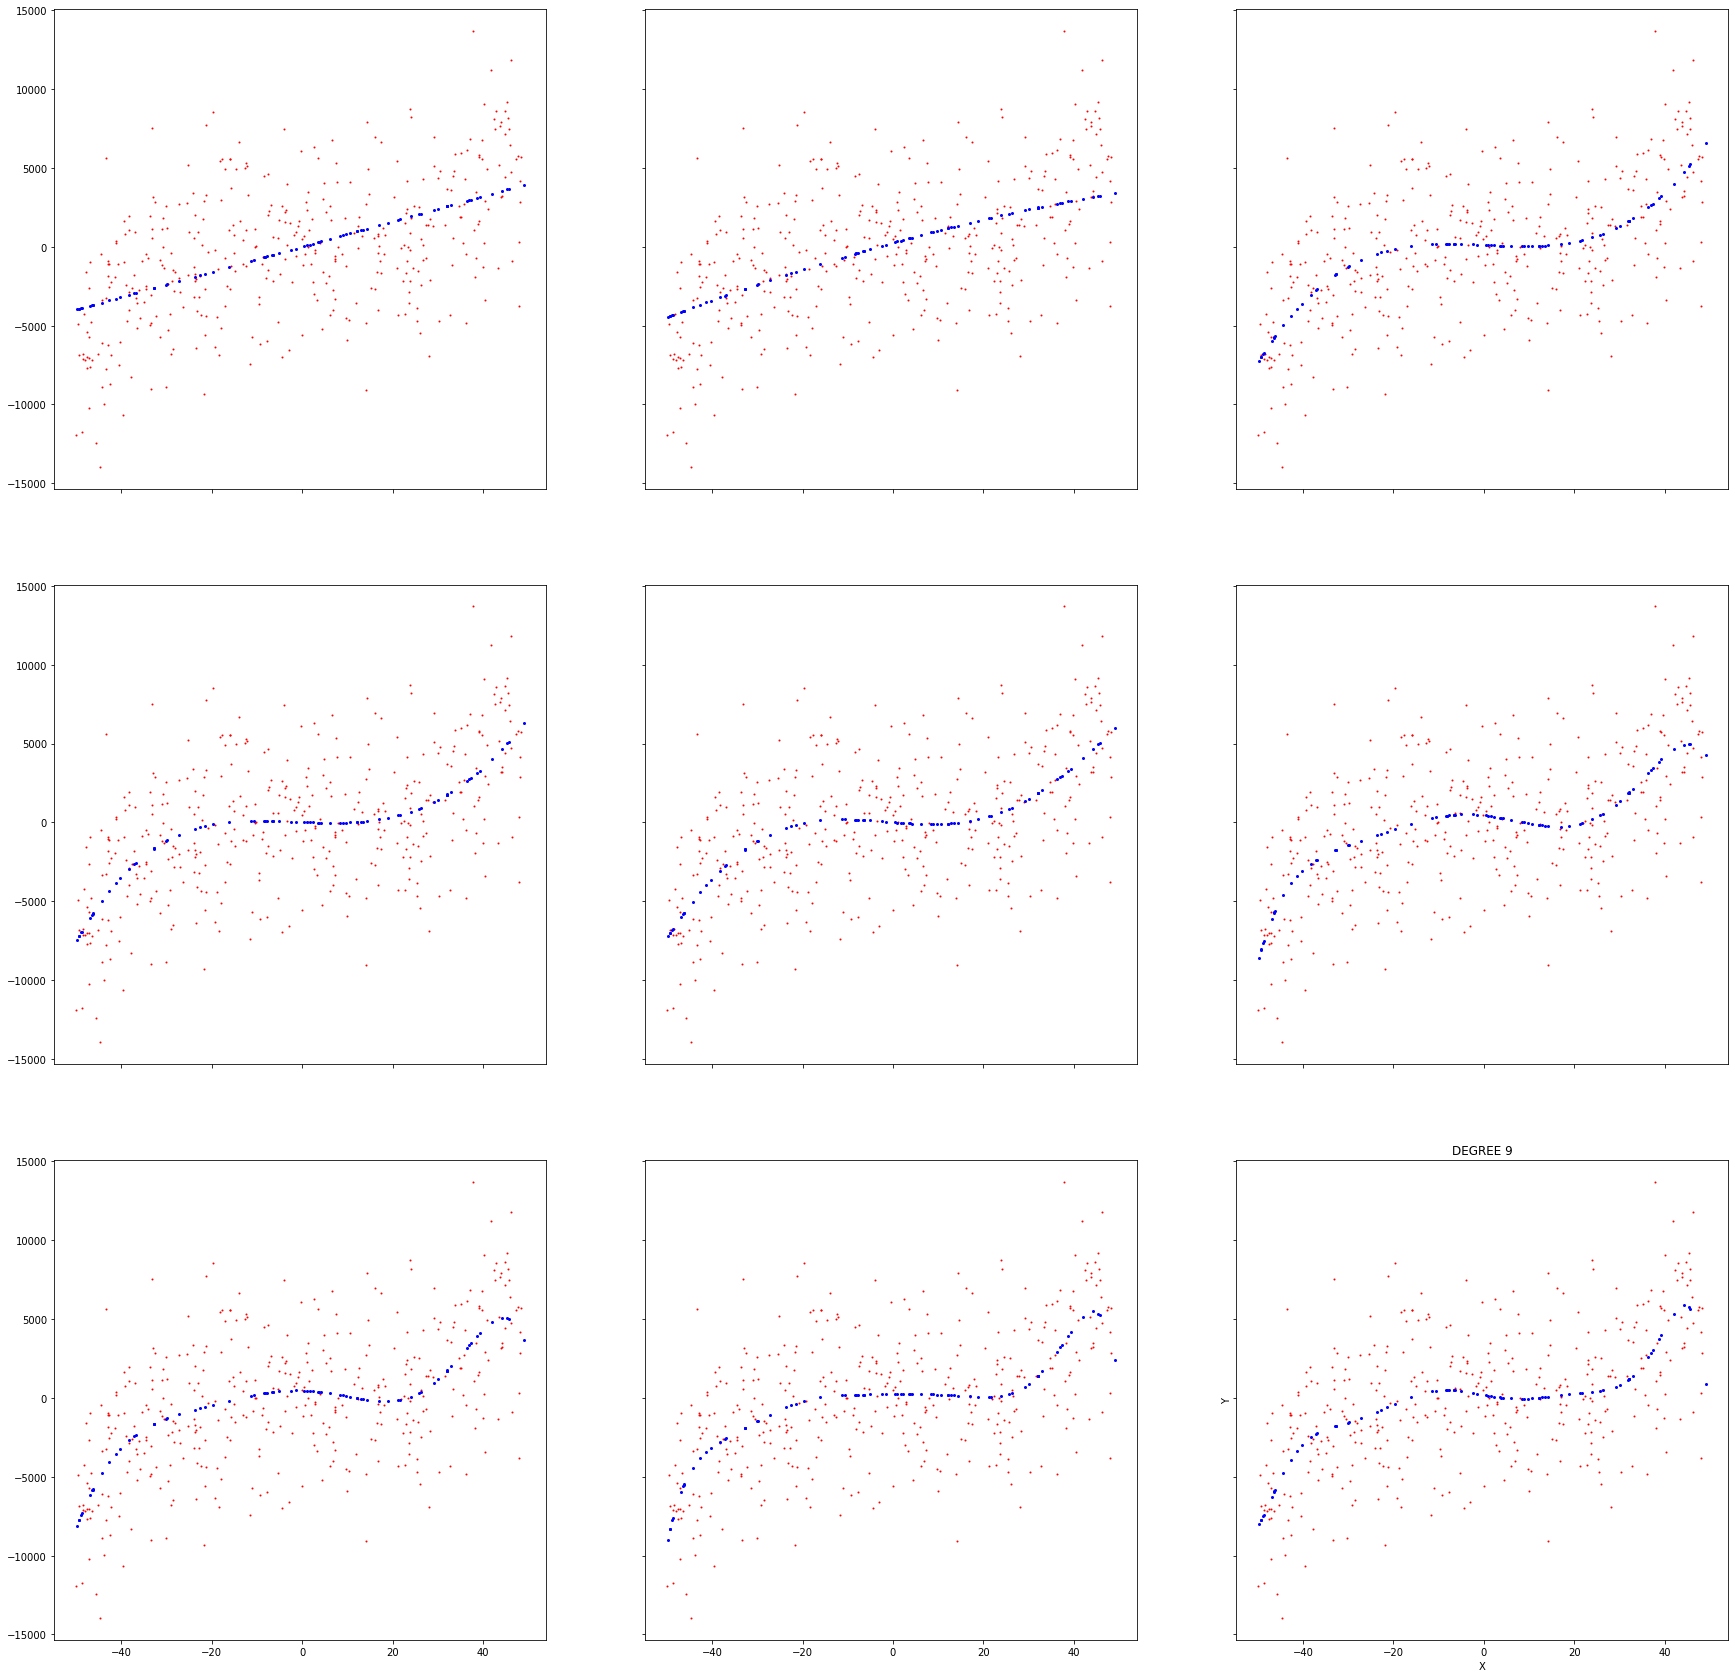

TRAINING SET  4


<Figure size 432x288 with 0 Axes>

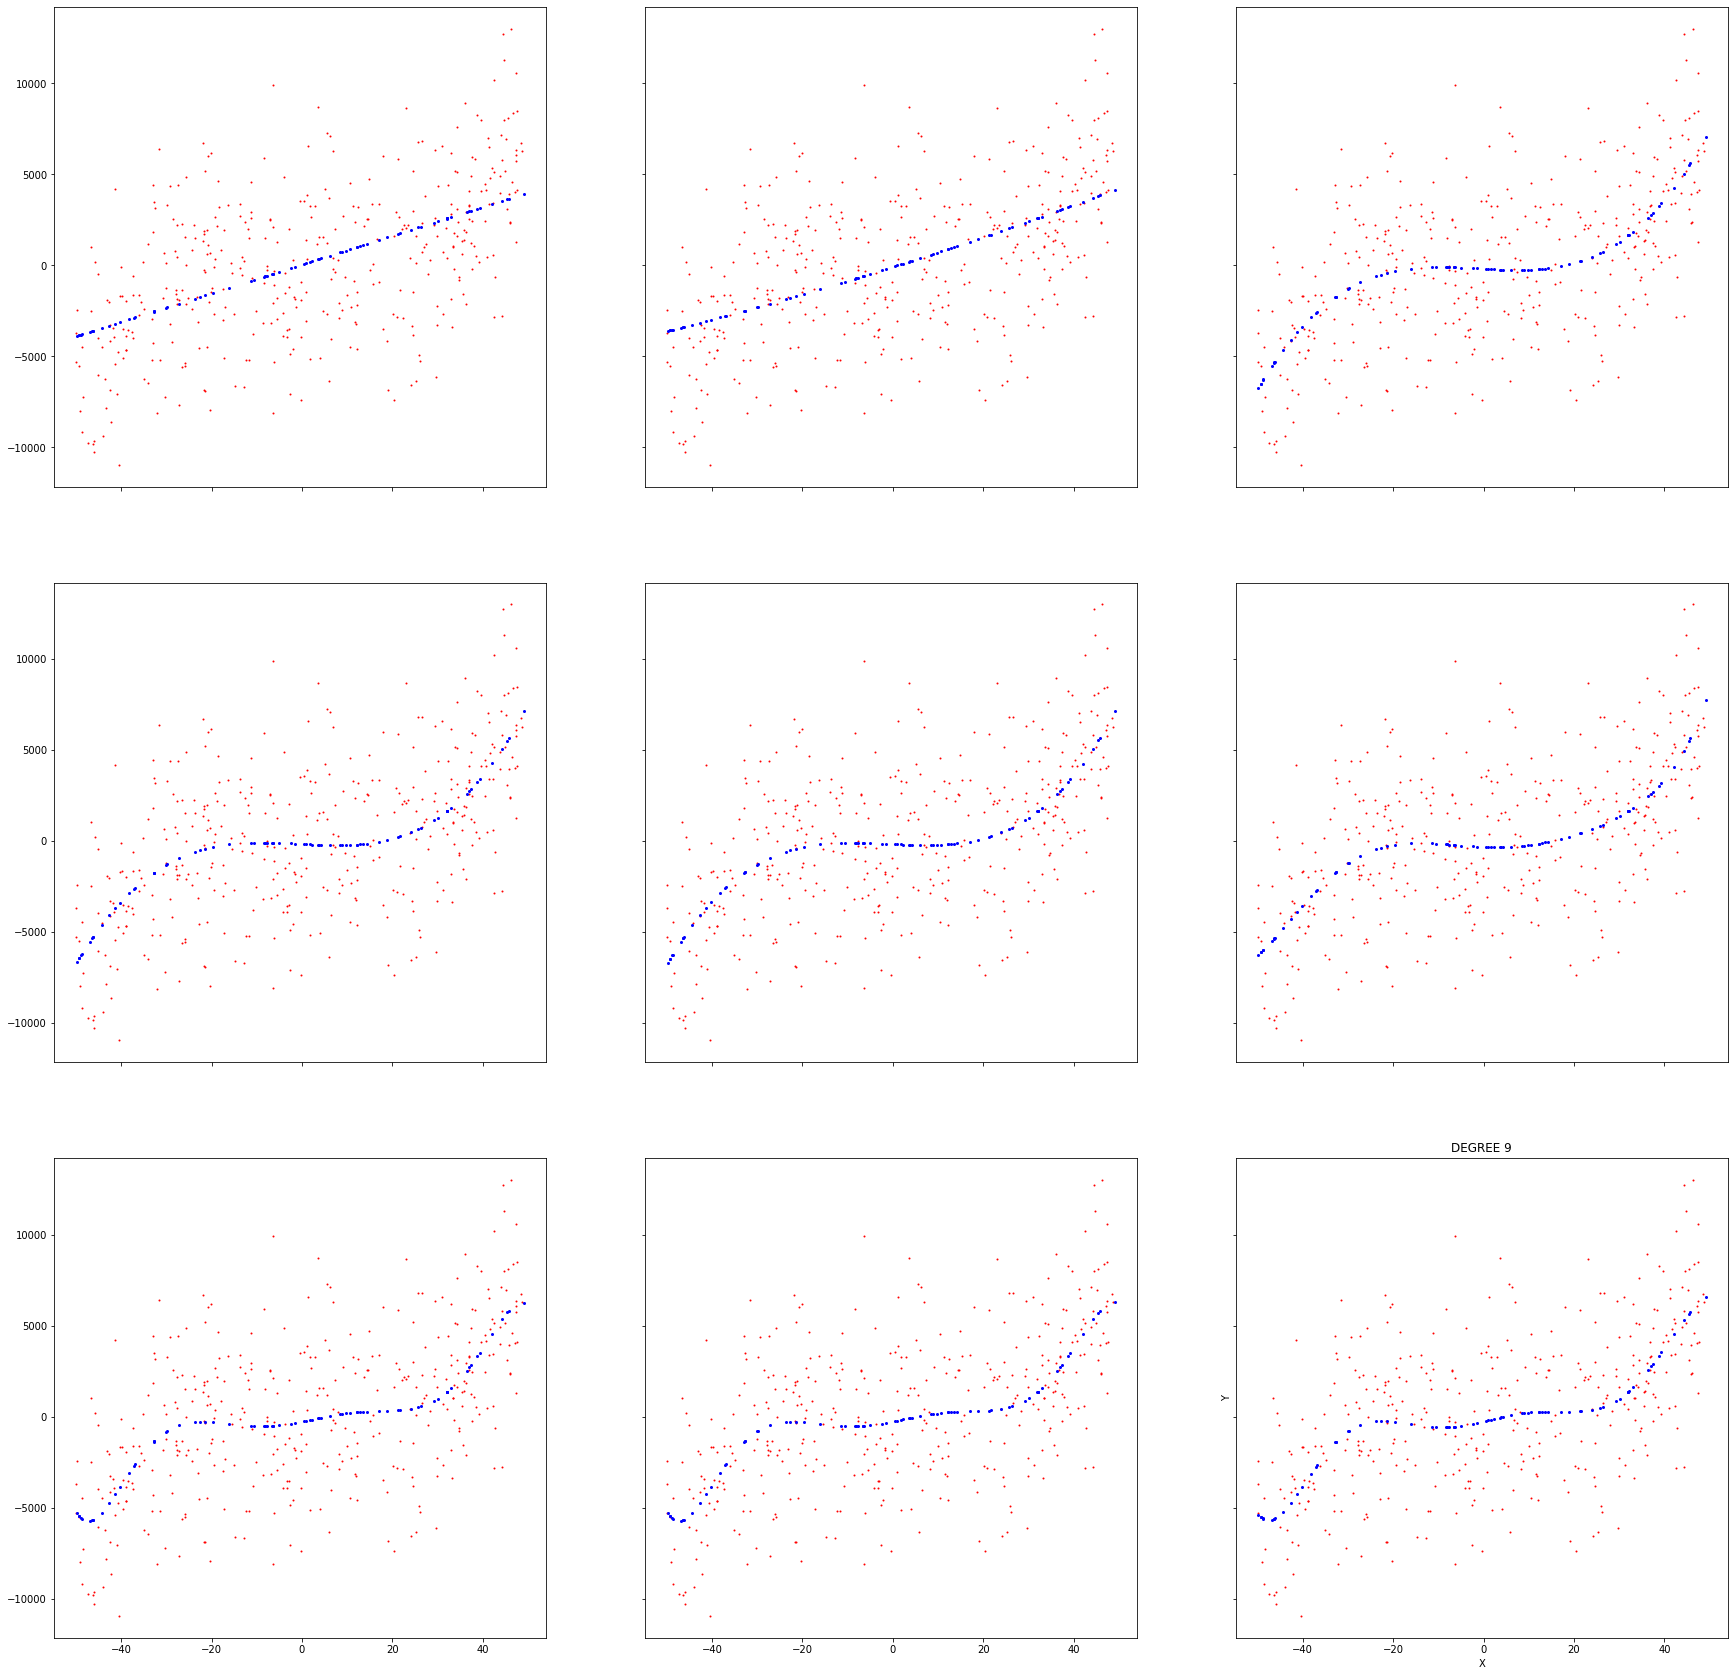

TRAINING SET  5


<Figure size 432x288 with 0 Axes>

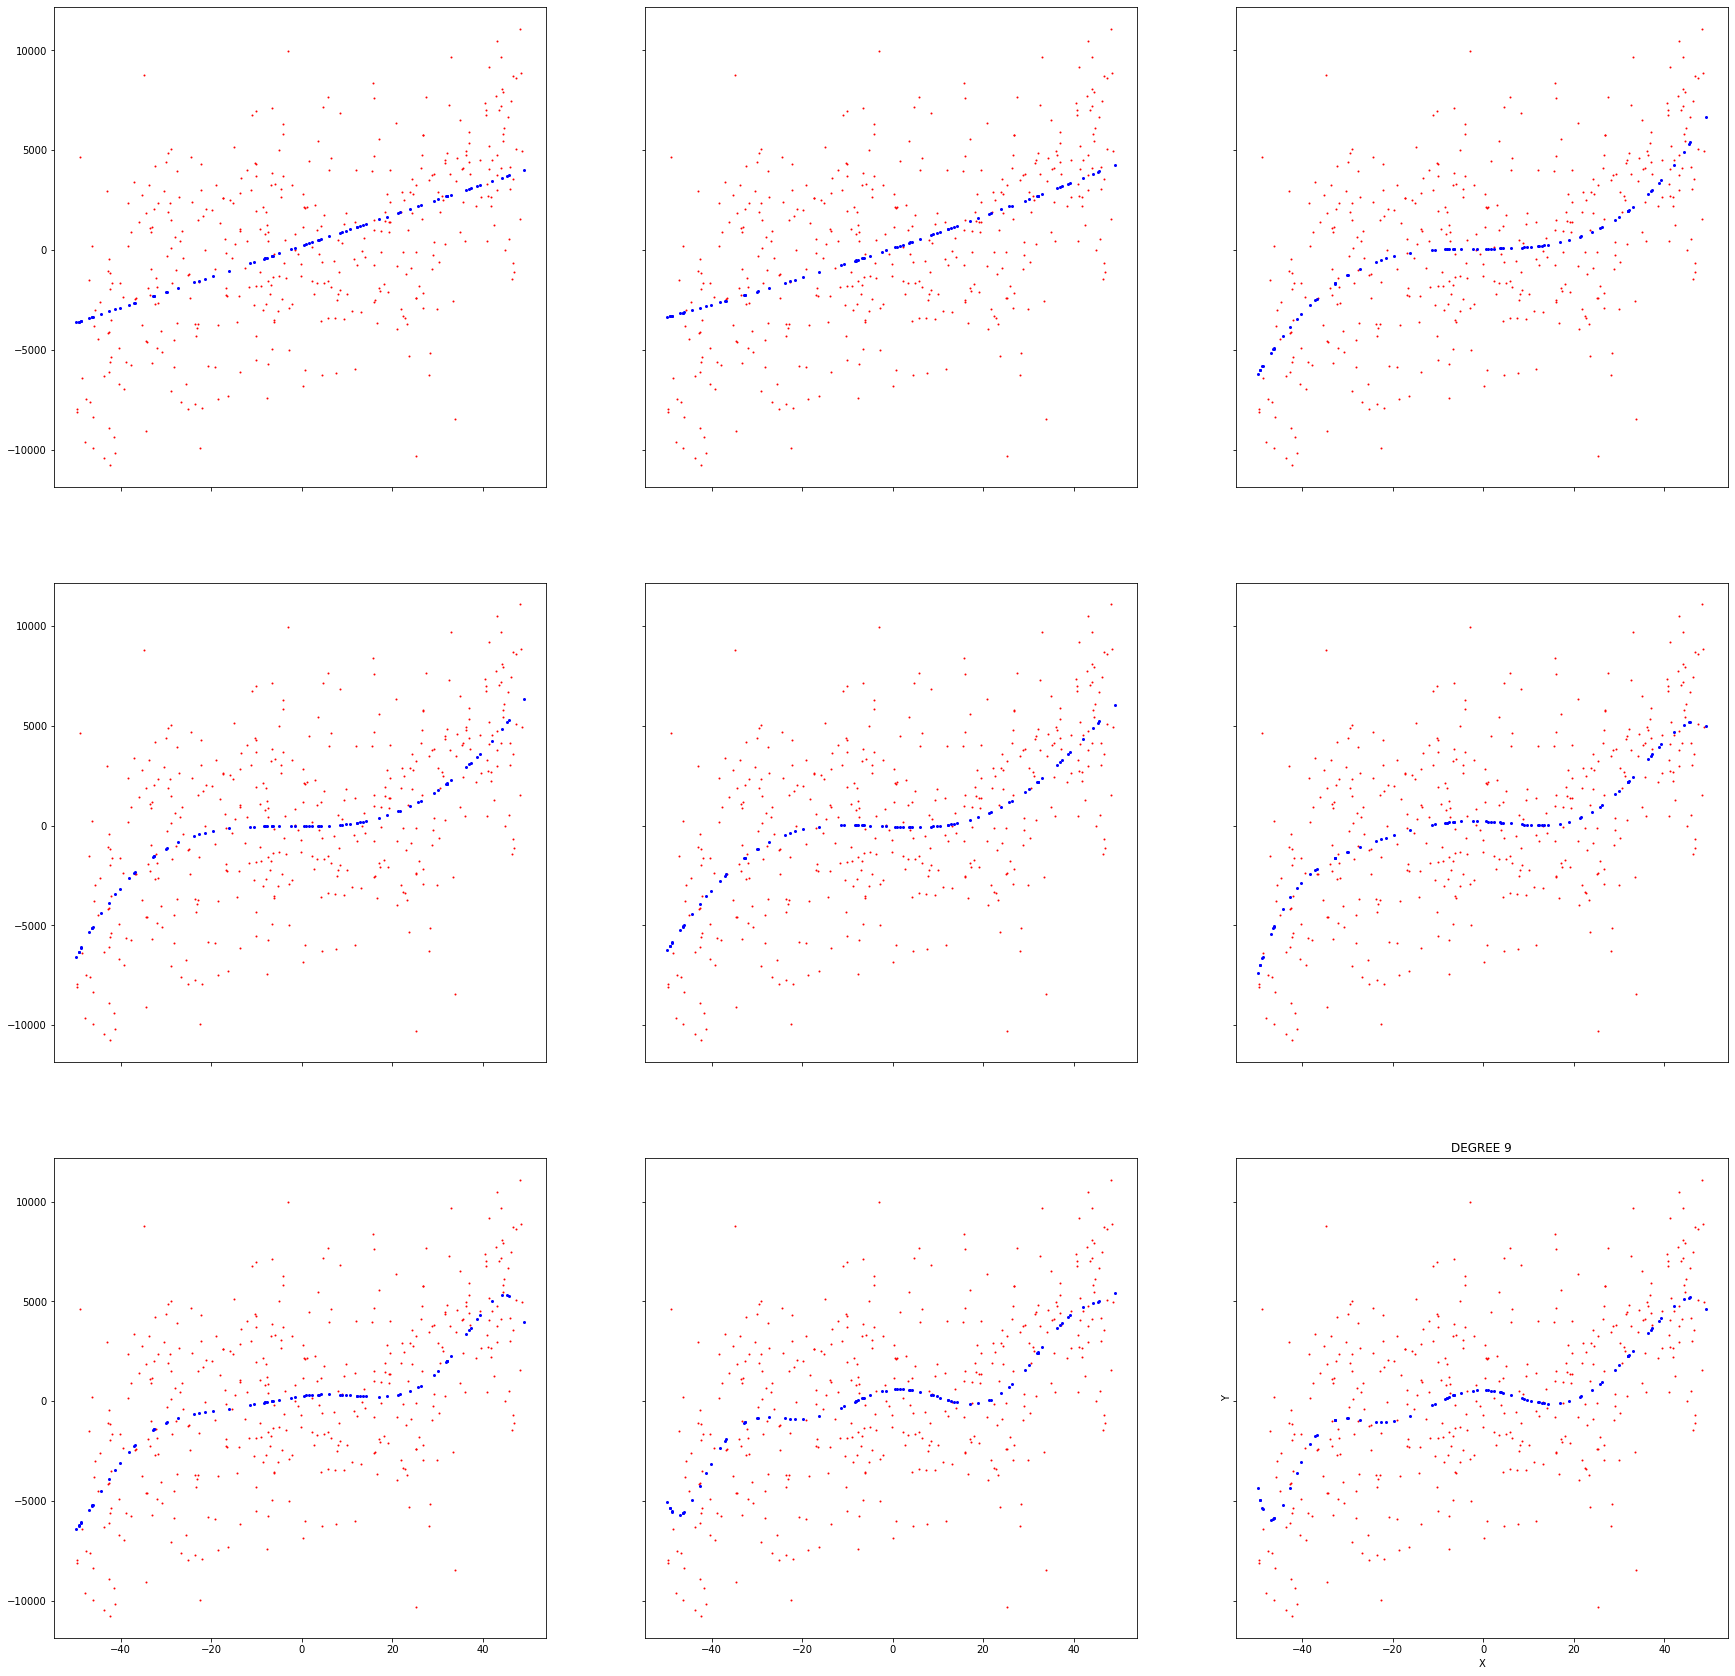

TRAINING SET  6


<Figure size 432x288 with 0 Axes>

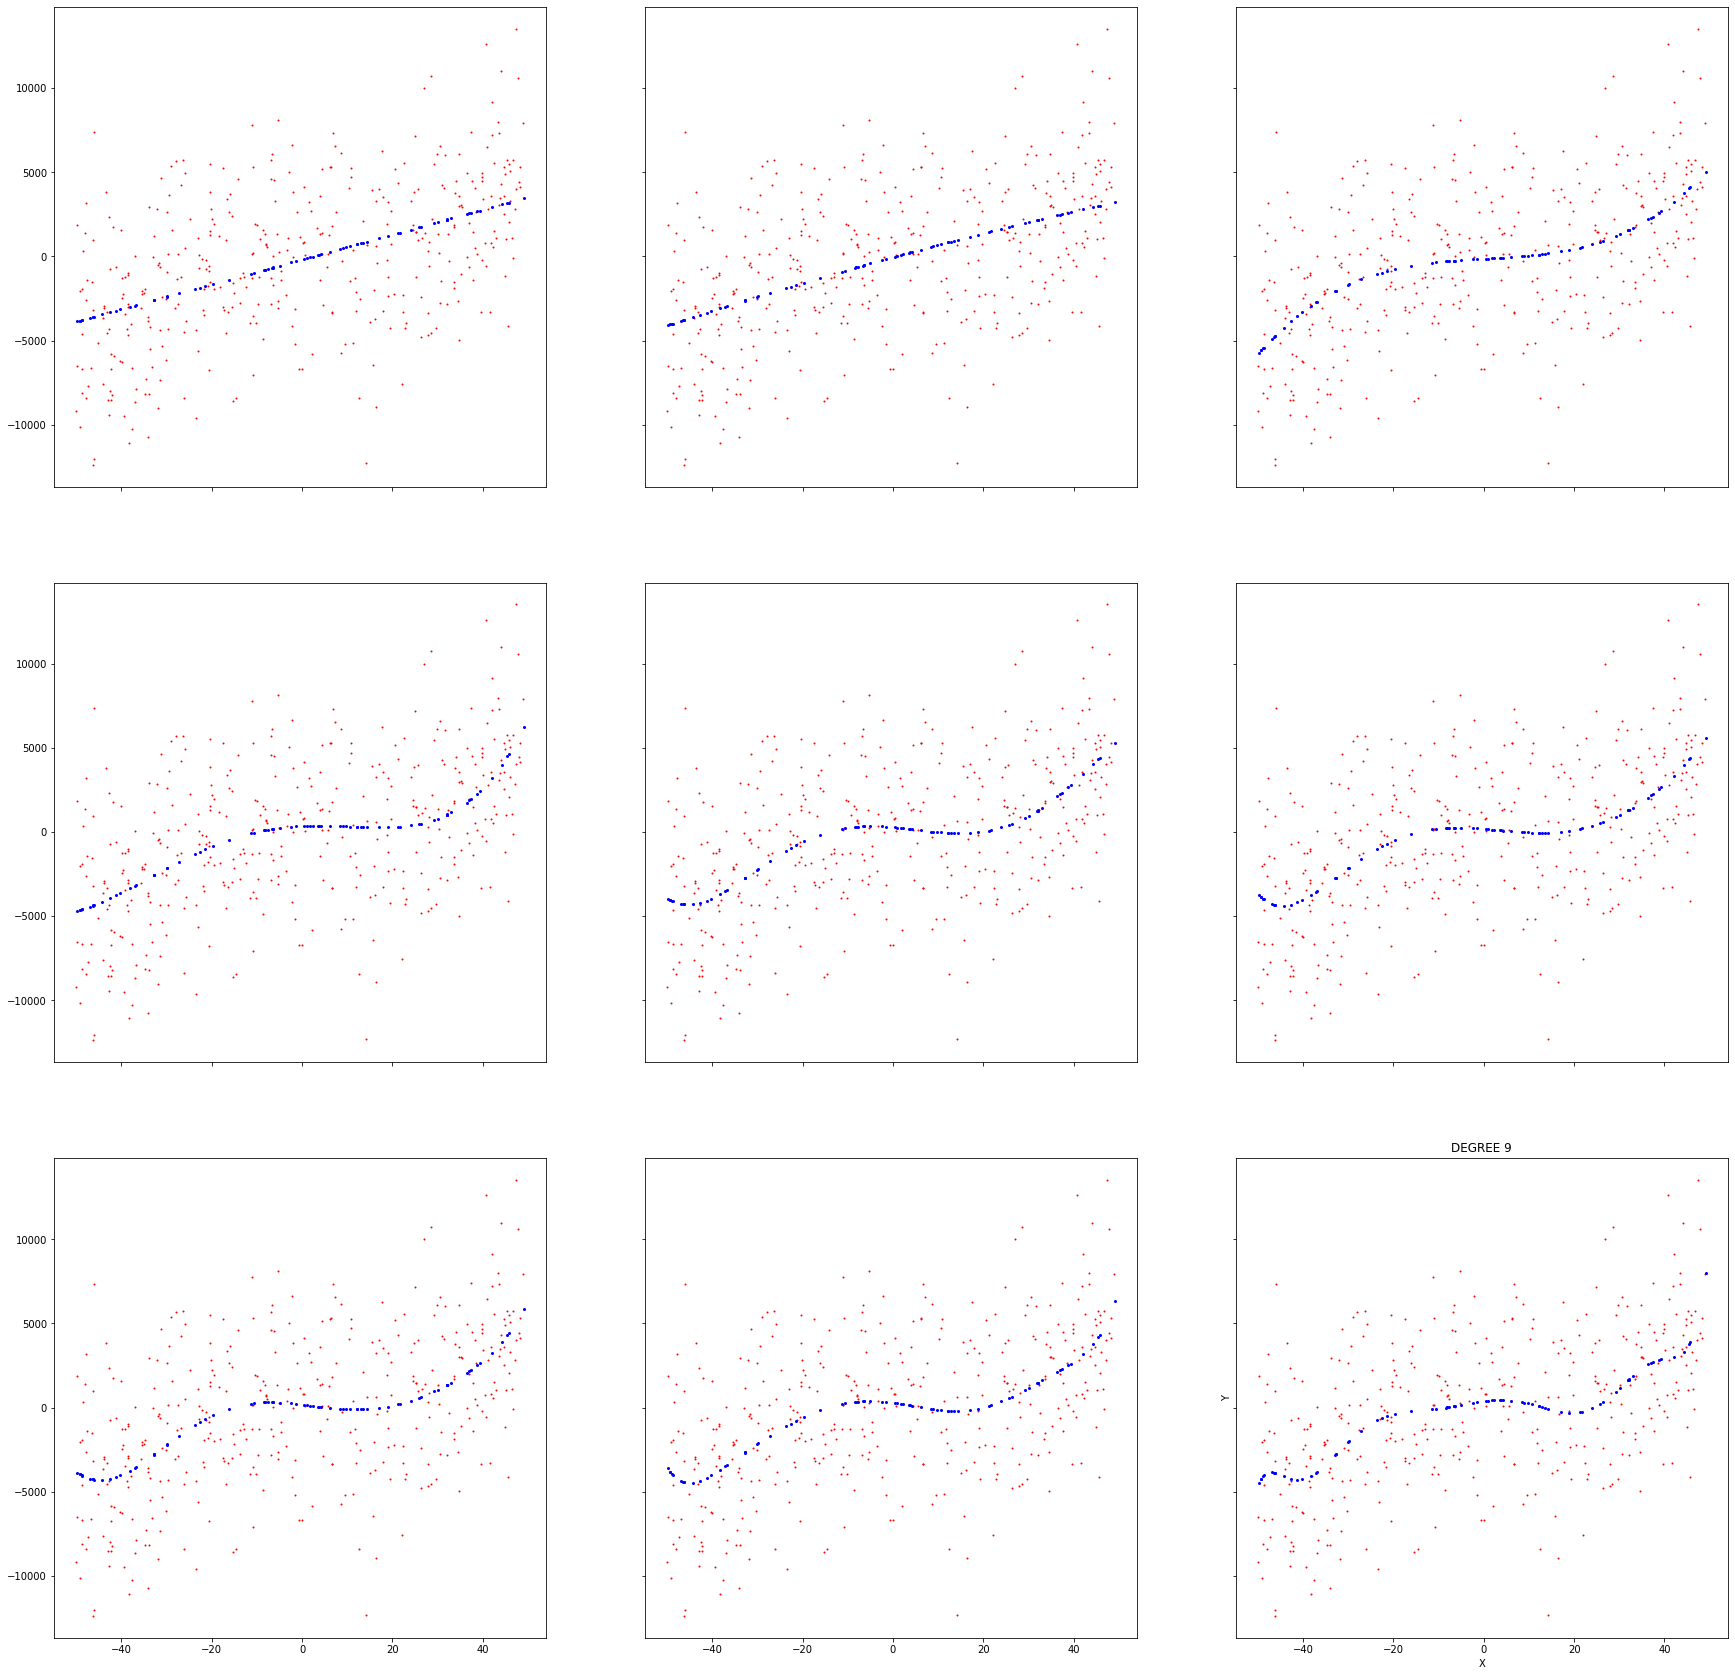

TRAINING SET  7


<Figure size 432x288 with 0 Axes>

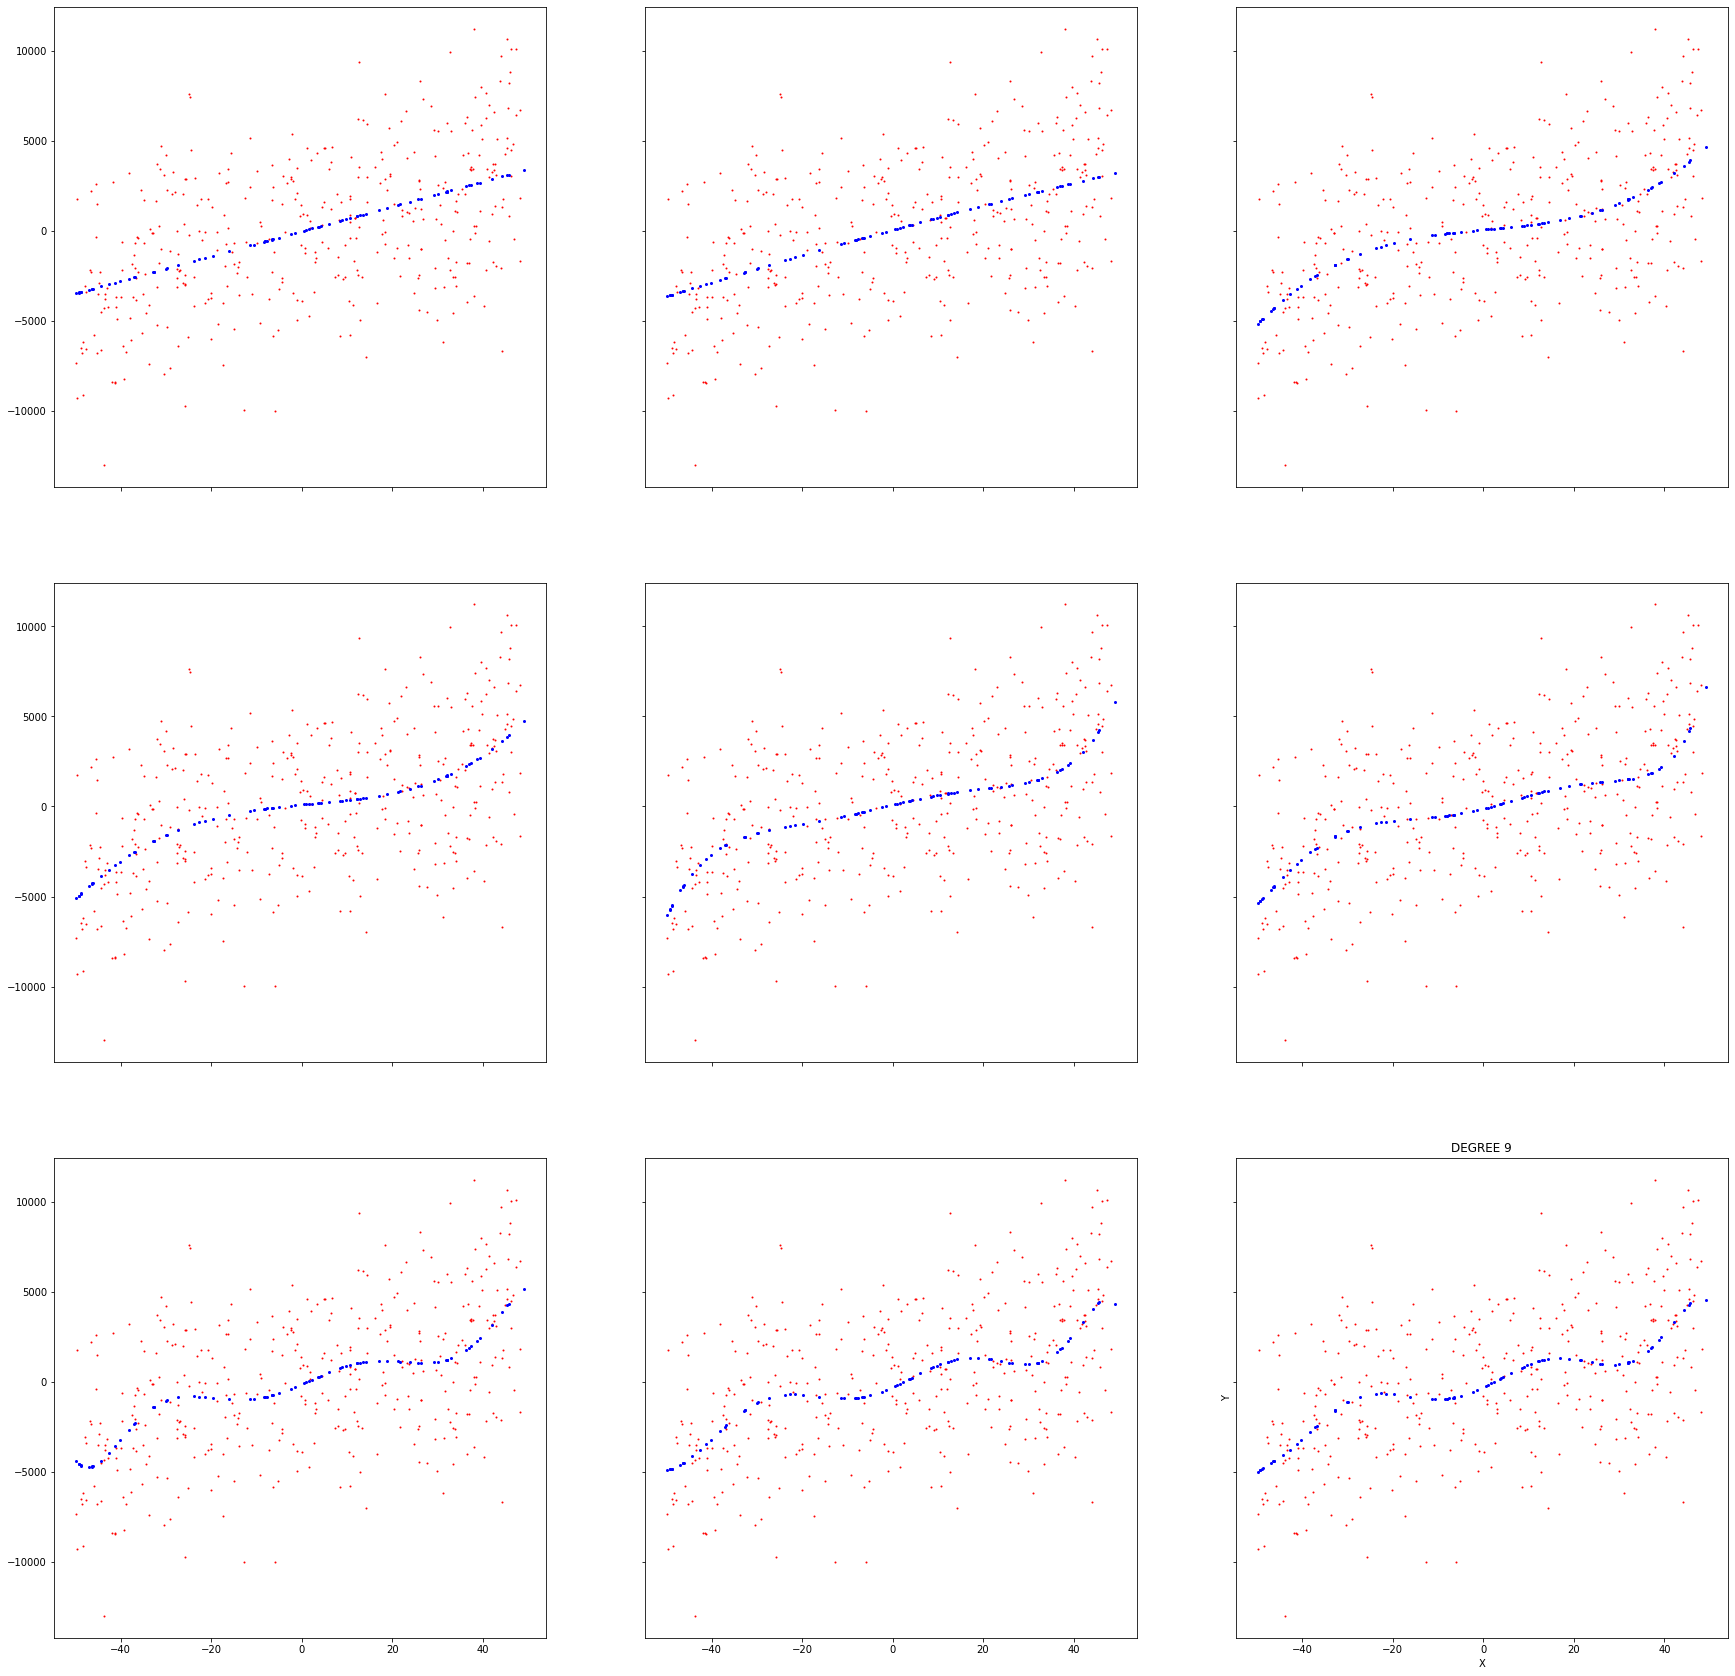

TRAINING SET  8


<Figure size 432x288 with 0 Axes>

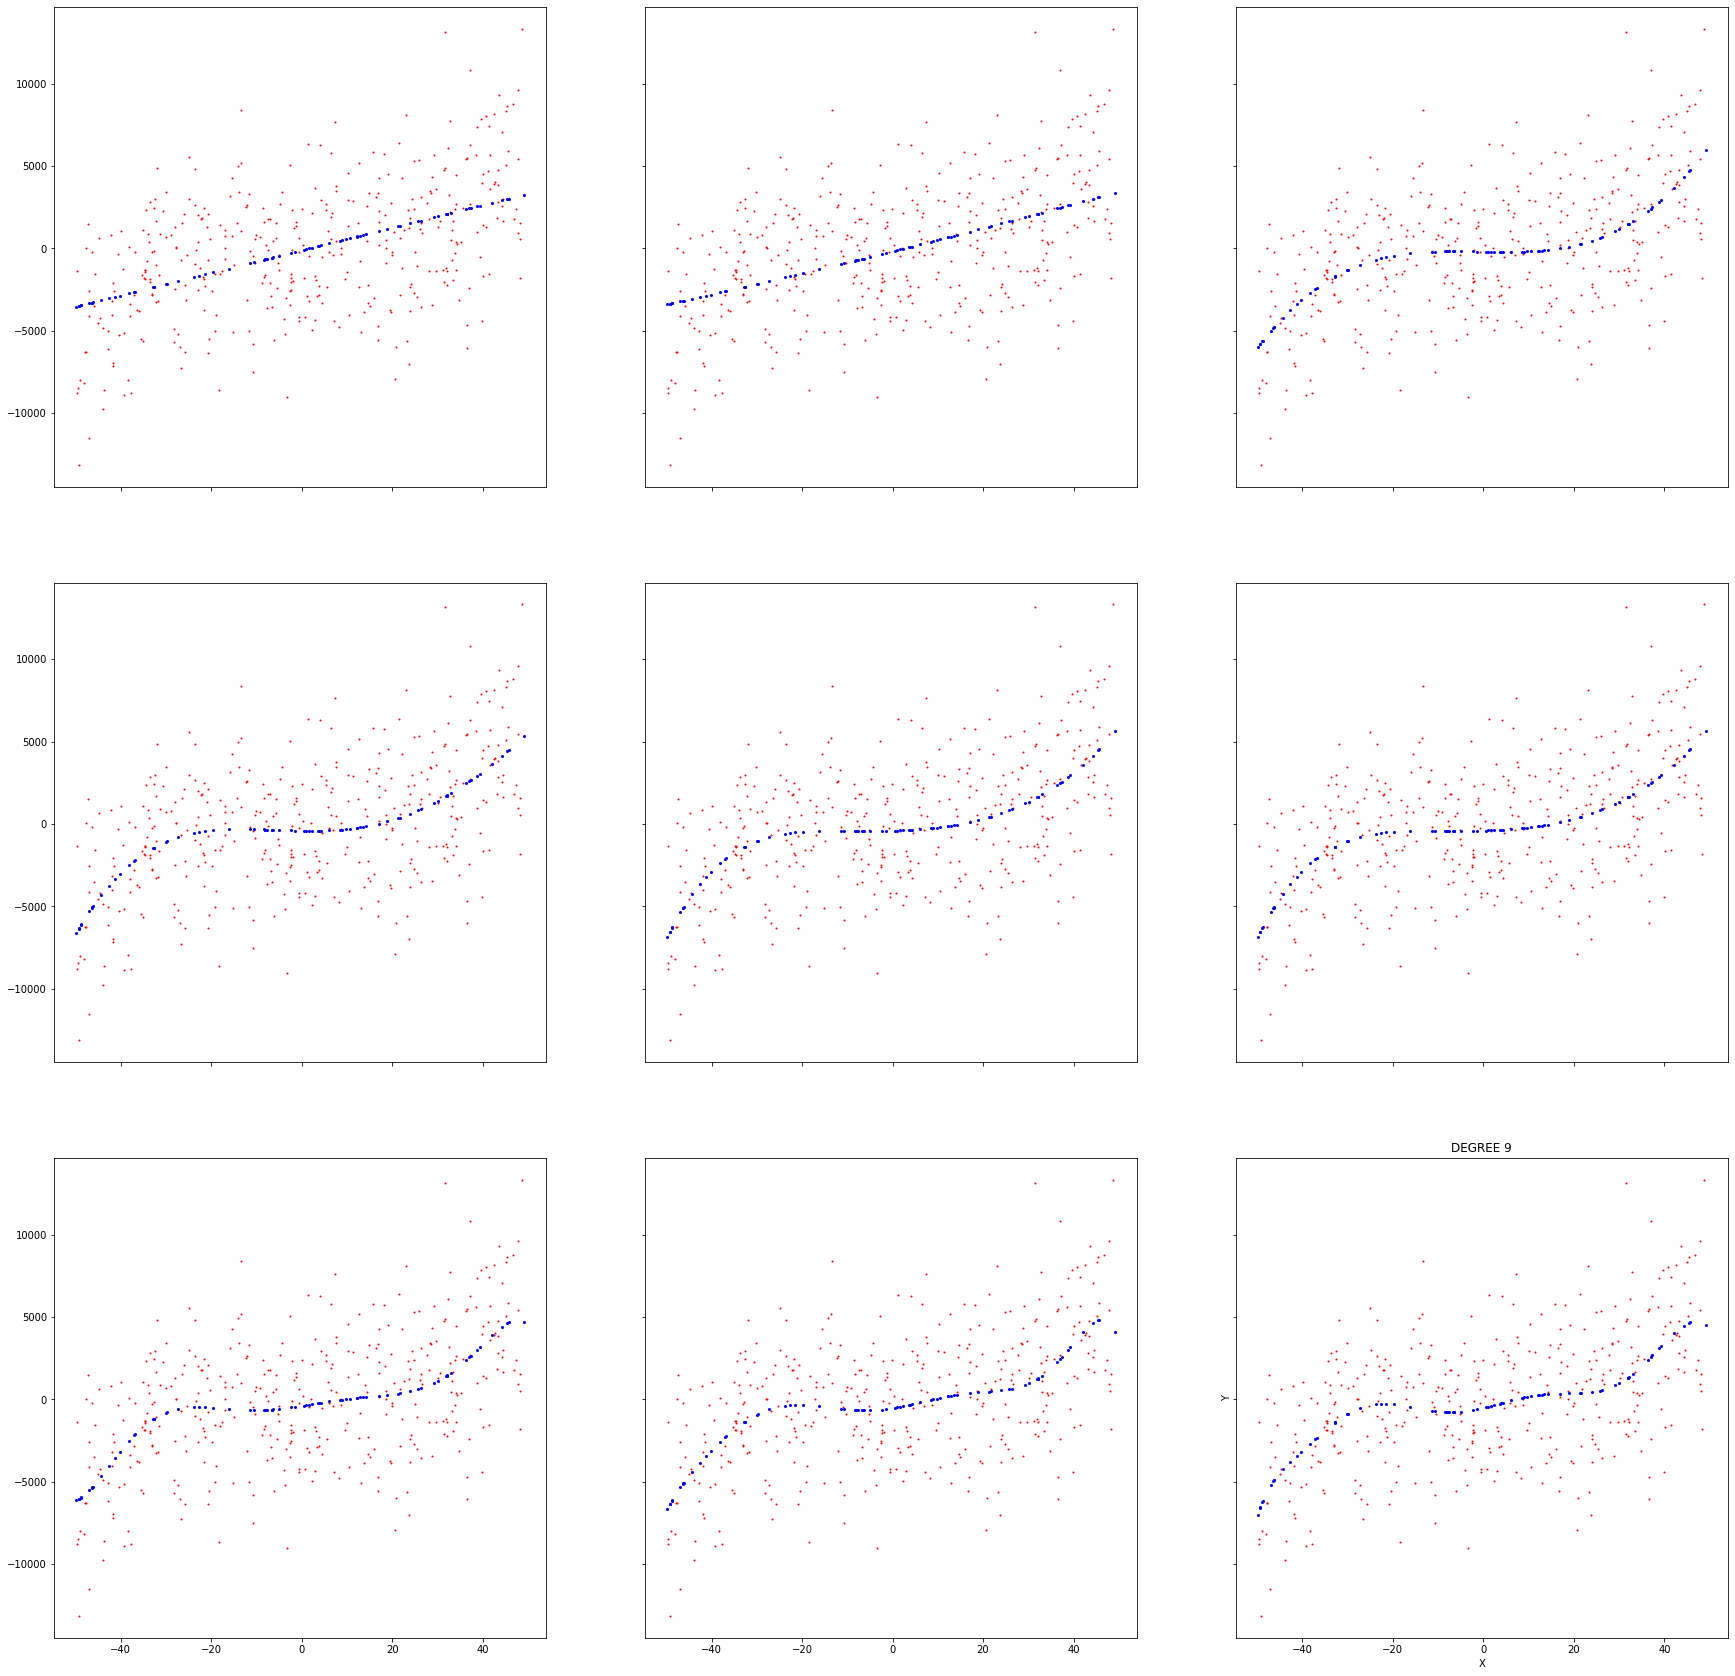

TRAINING SET  9


<Figure size 432x288 with 0 Axes>

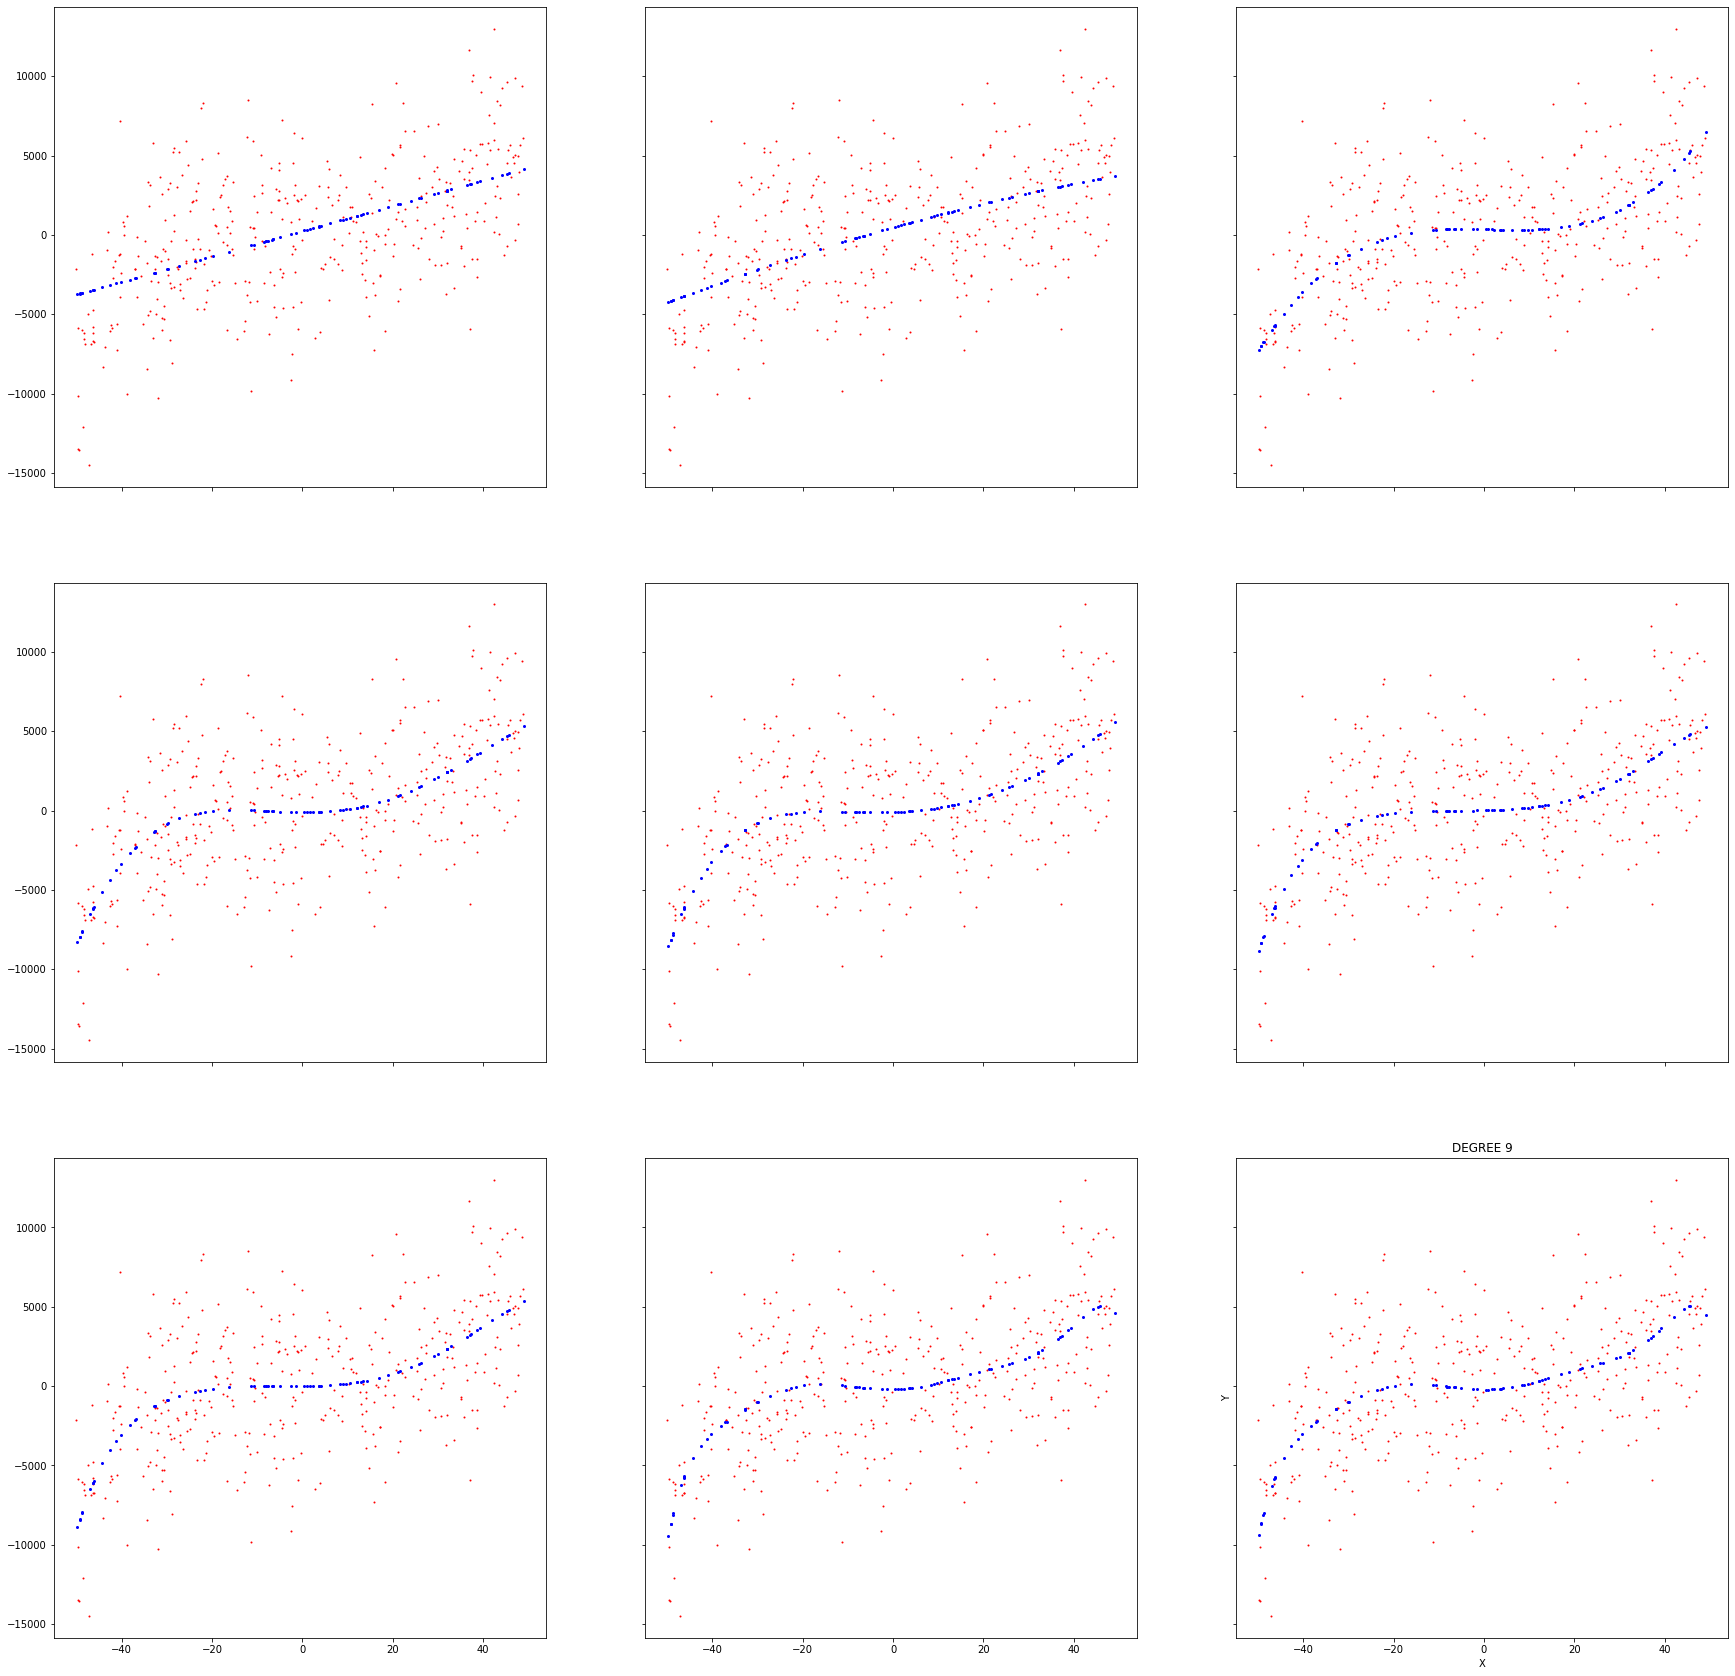

TRAINING SET  10


<Figure size 432x288 with 0 Axes>

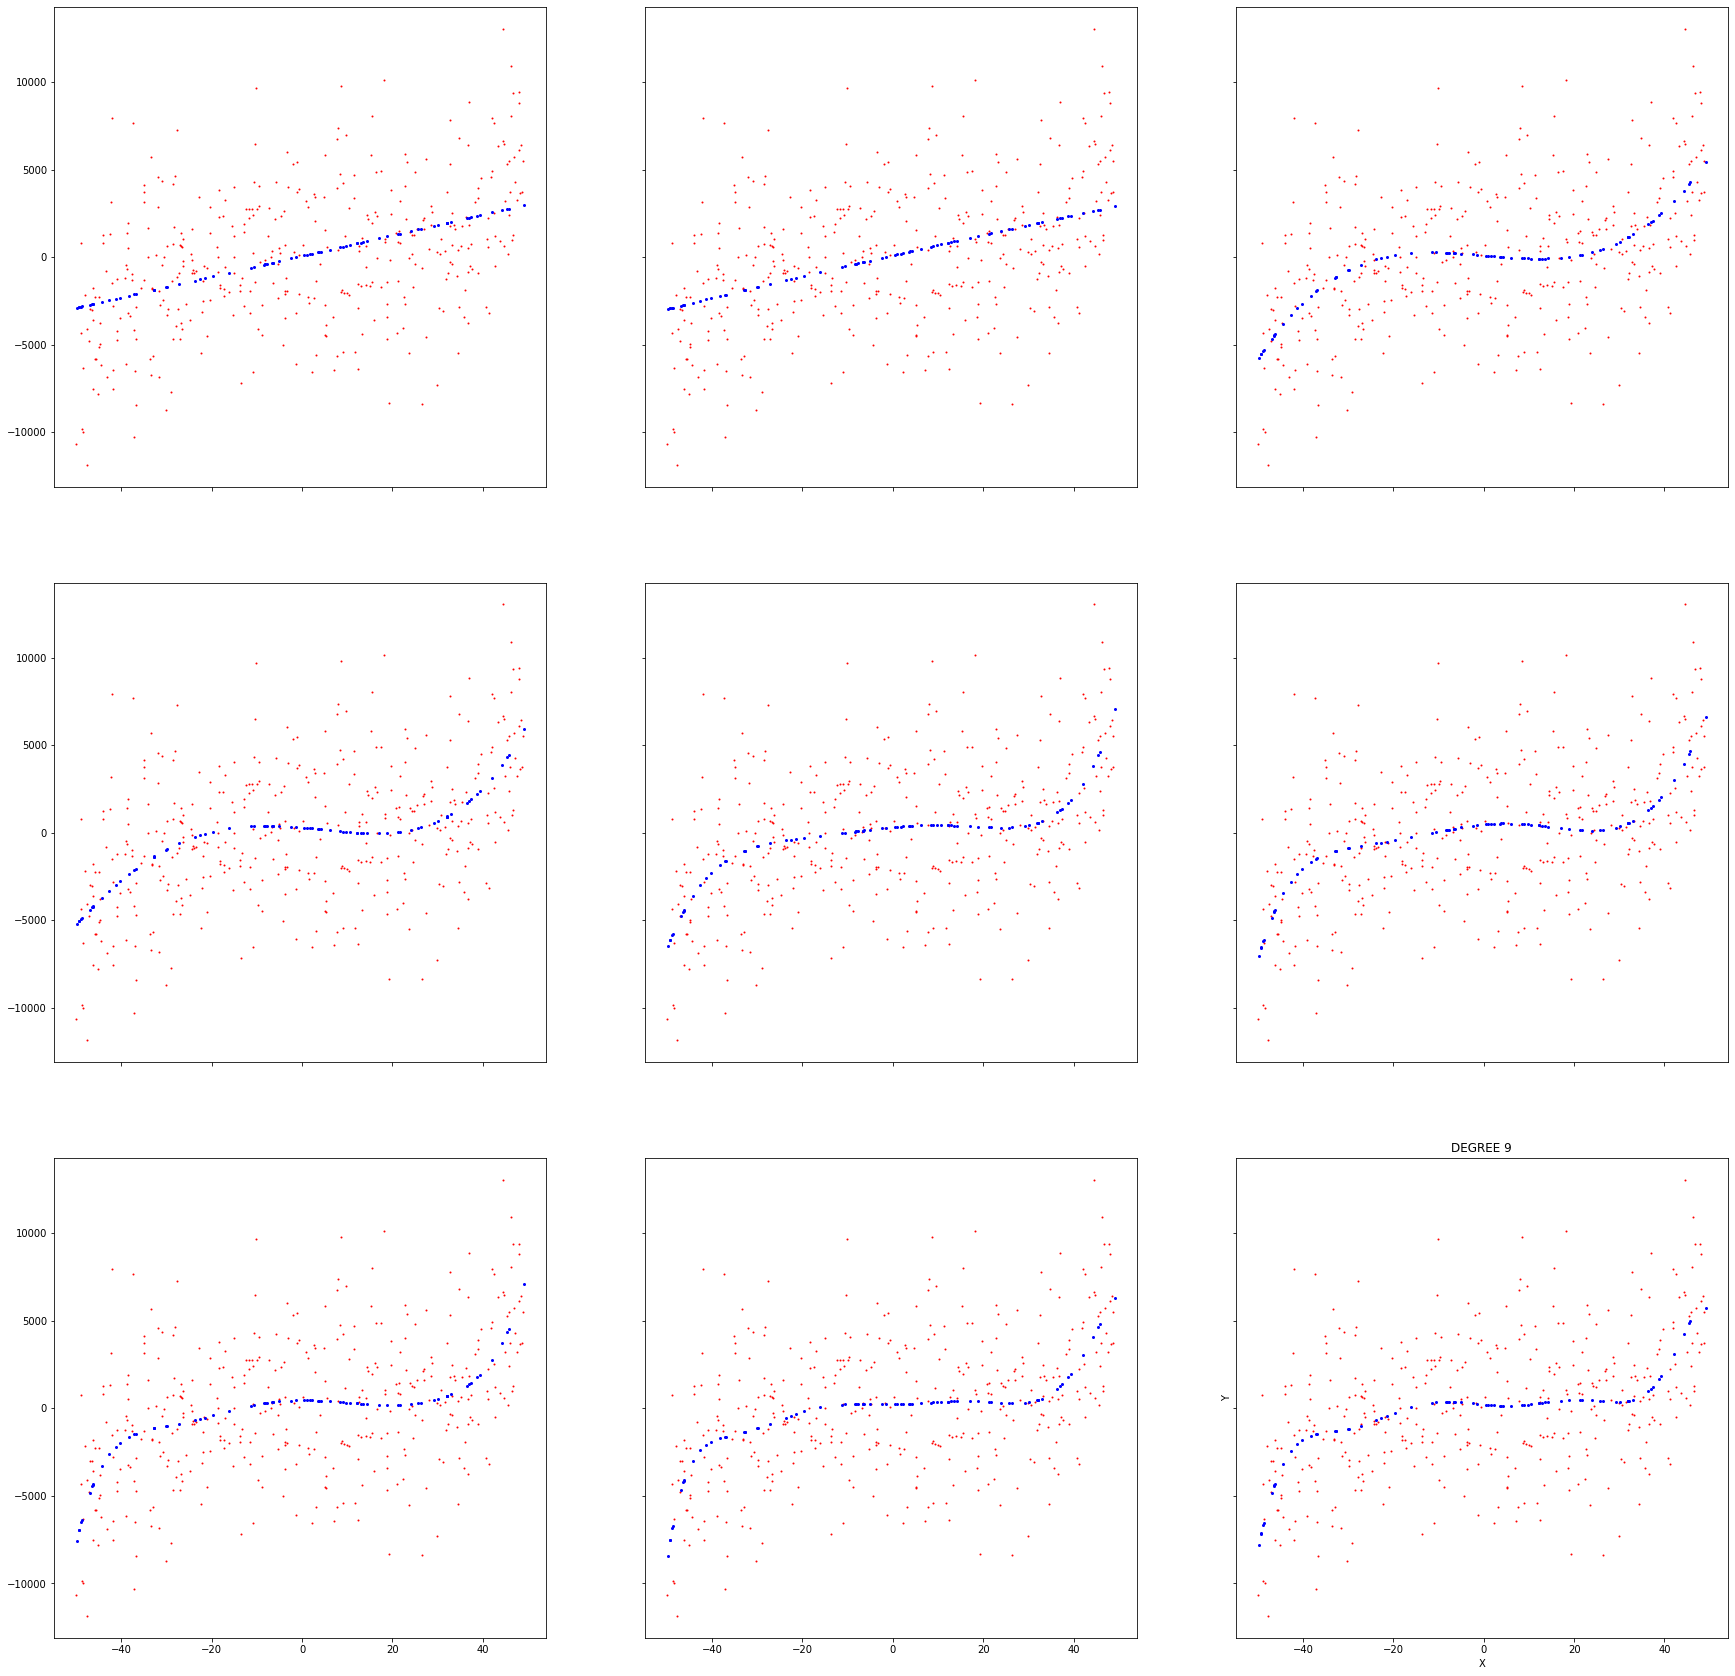

TRAINING SET  11


<Figure size 432x288 with 0 Axes>

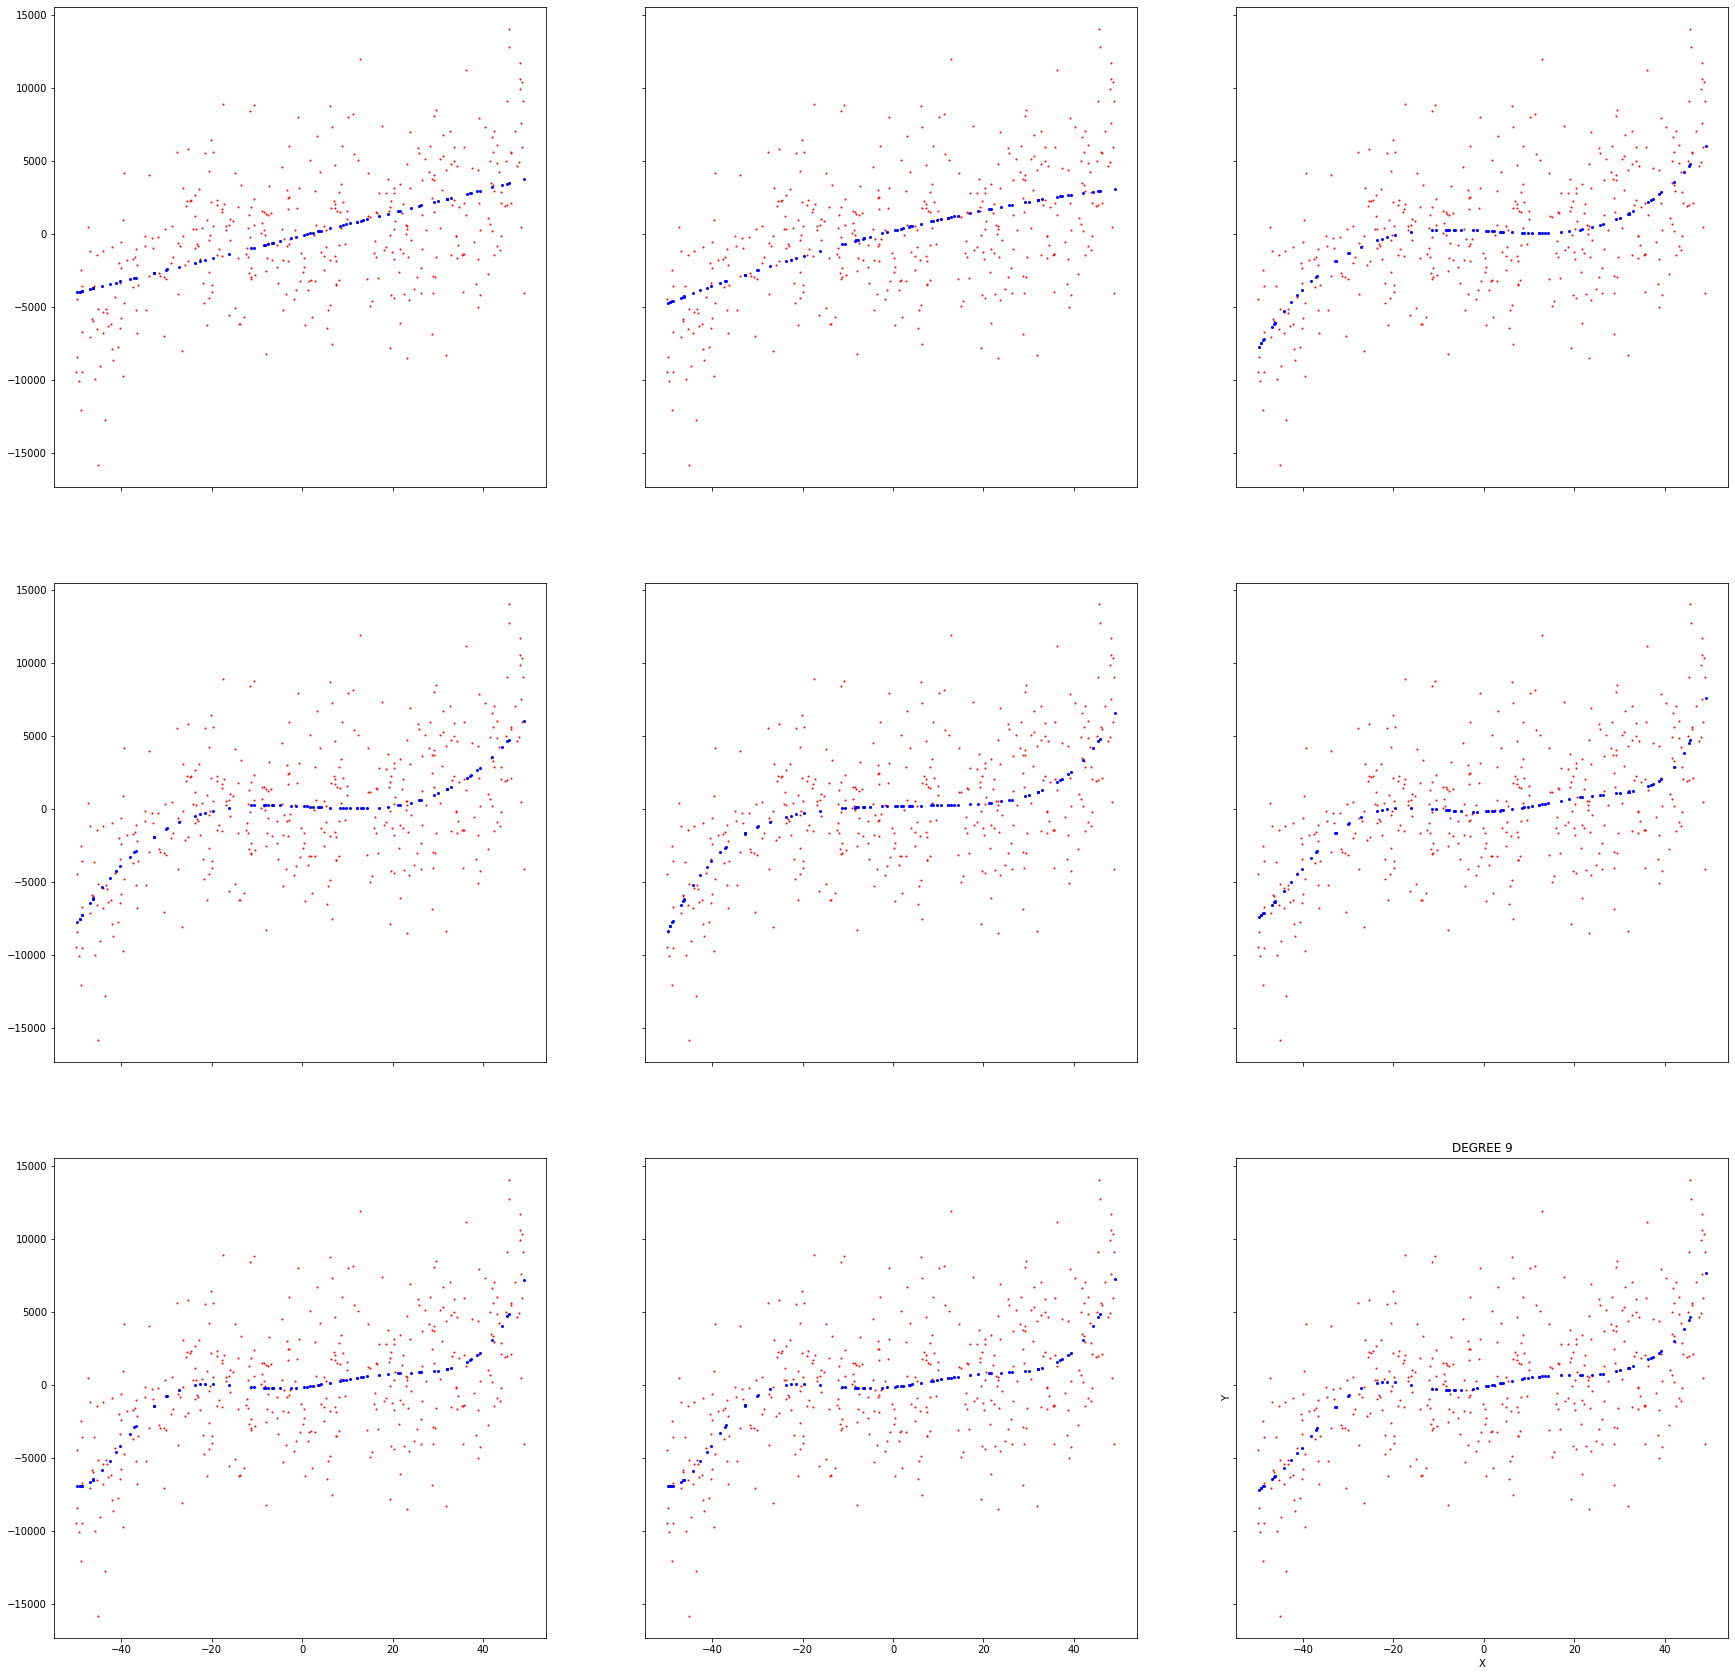

TRAINING SET  12


<Figure size 432x288 with 0 Axes>

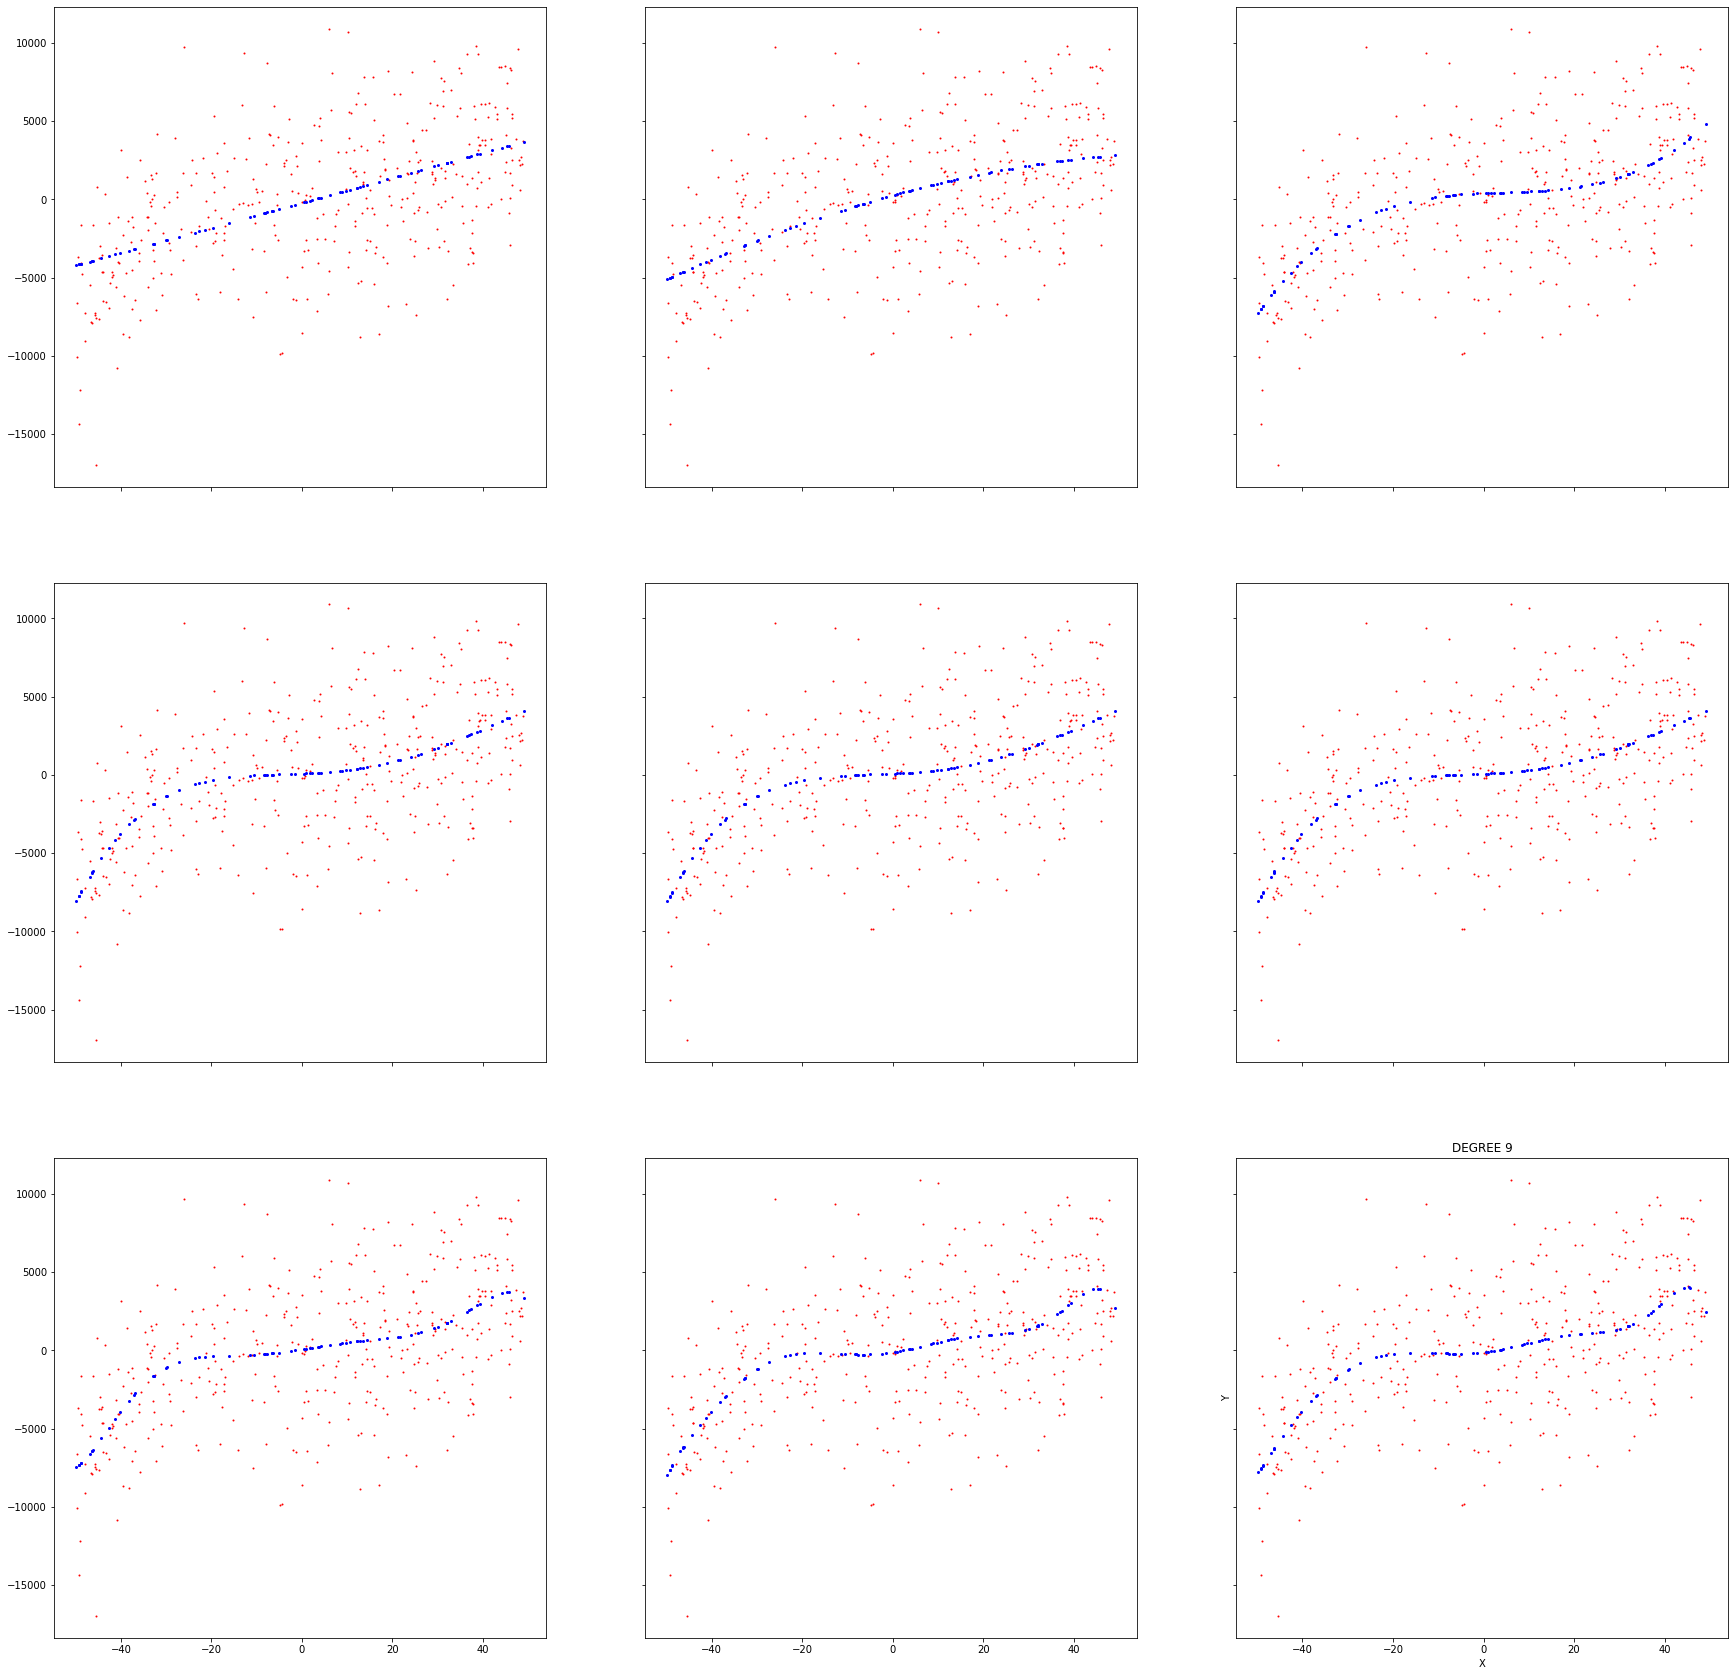

TRAINING SET  13


<Figure size 432x288 with 0 Axes>

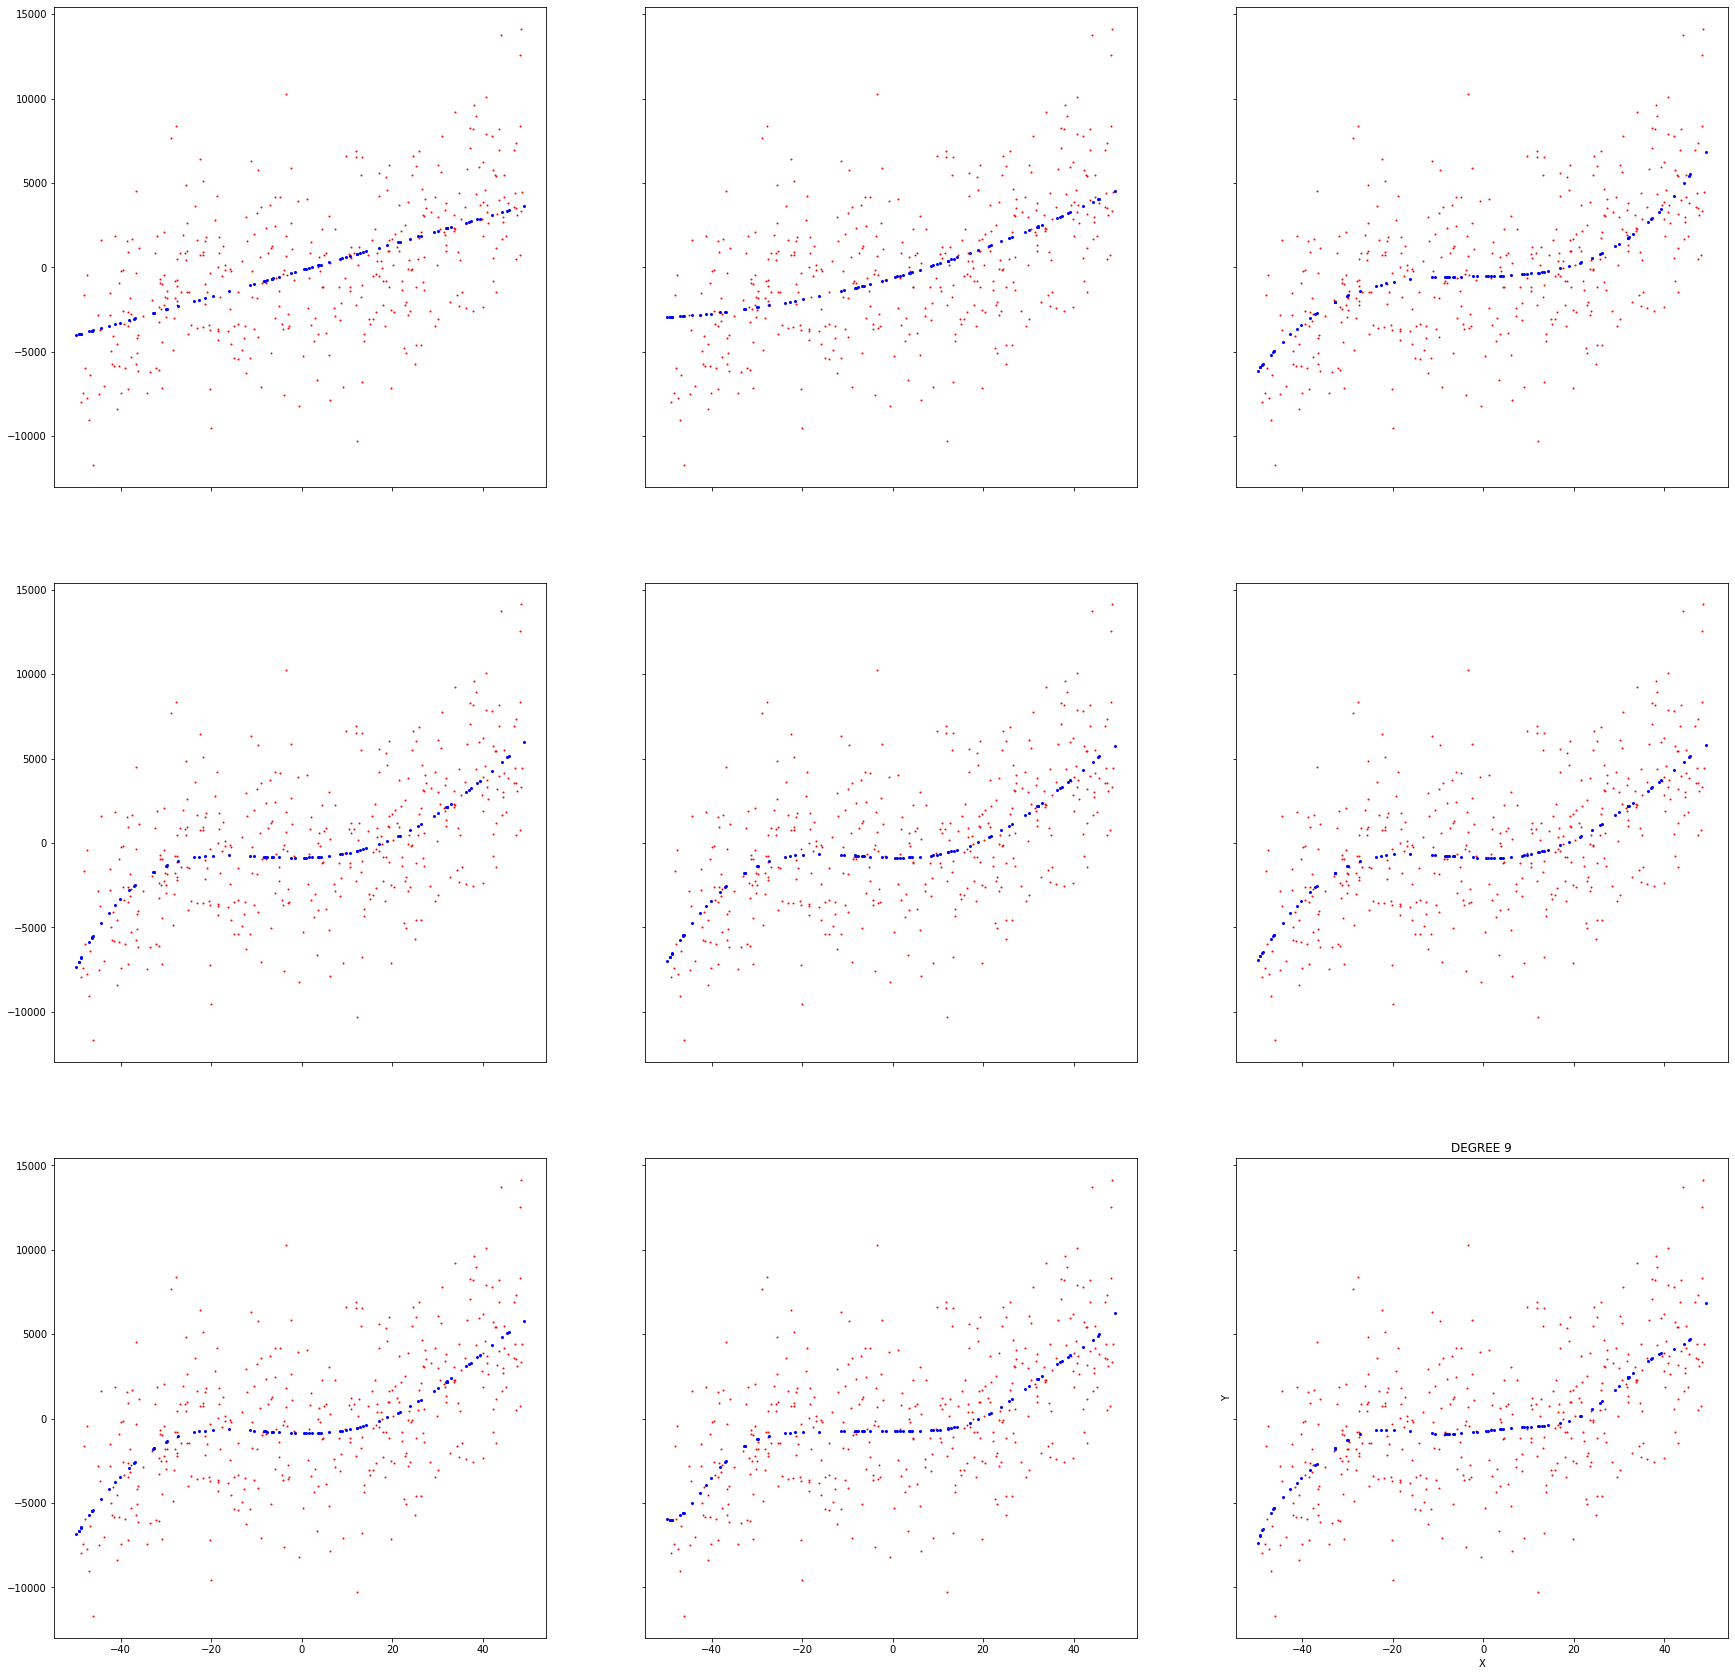

TRAINING SET  14


<Figure size 432x288 with 0 Axes>

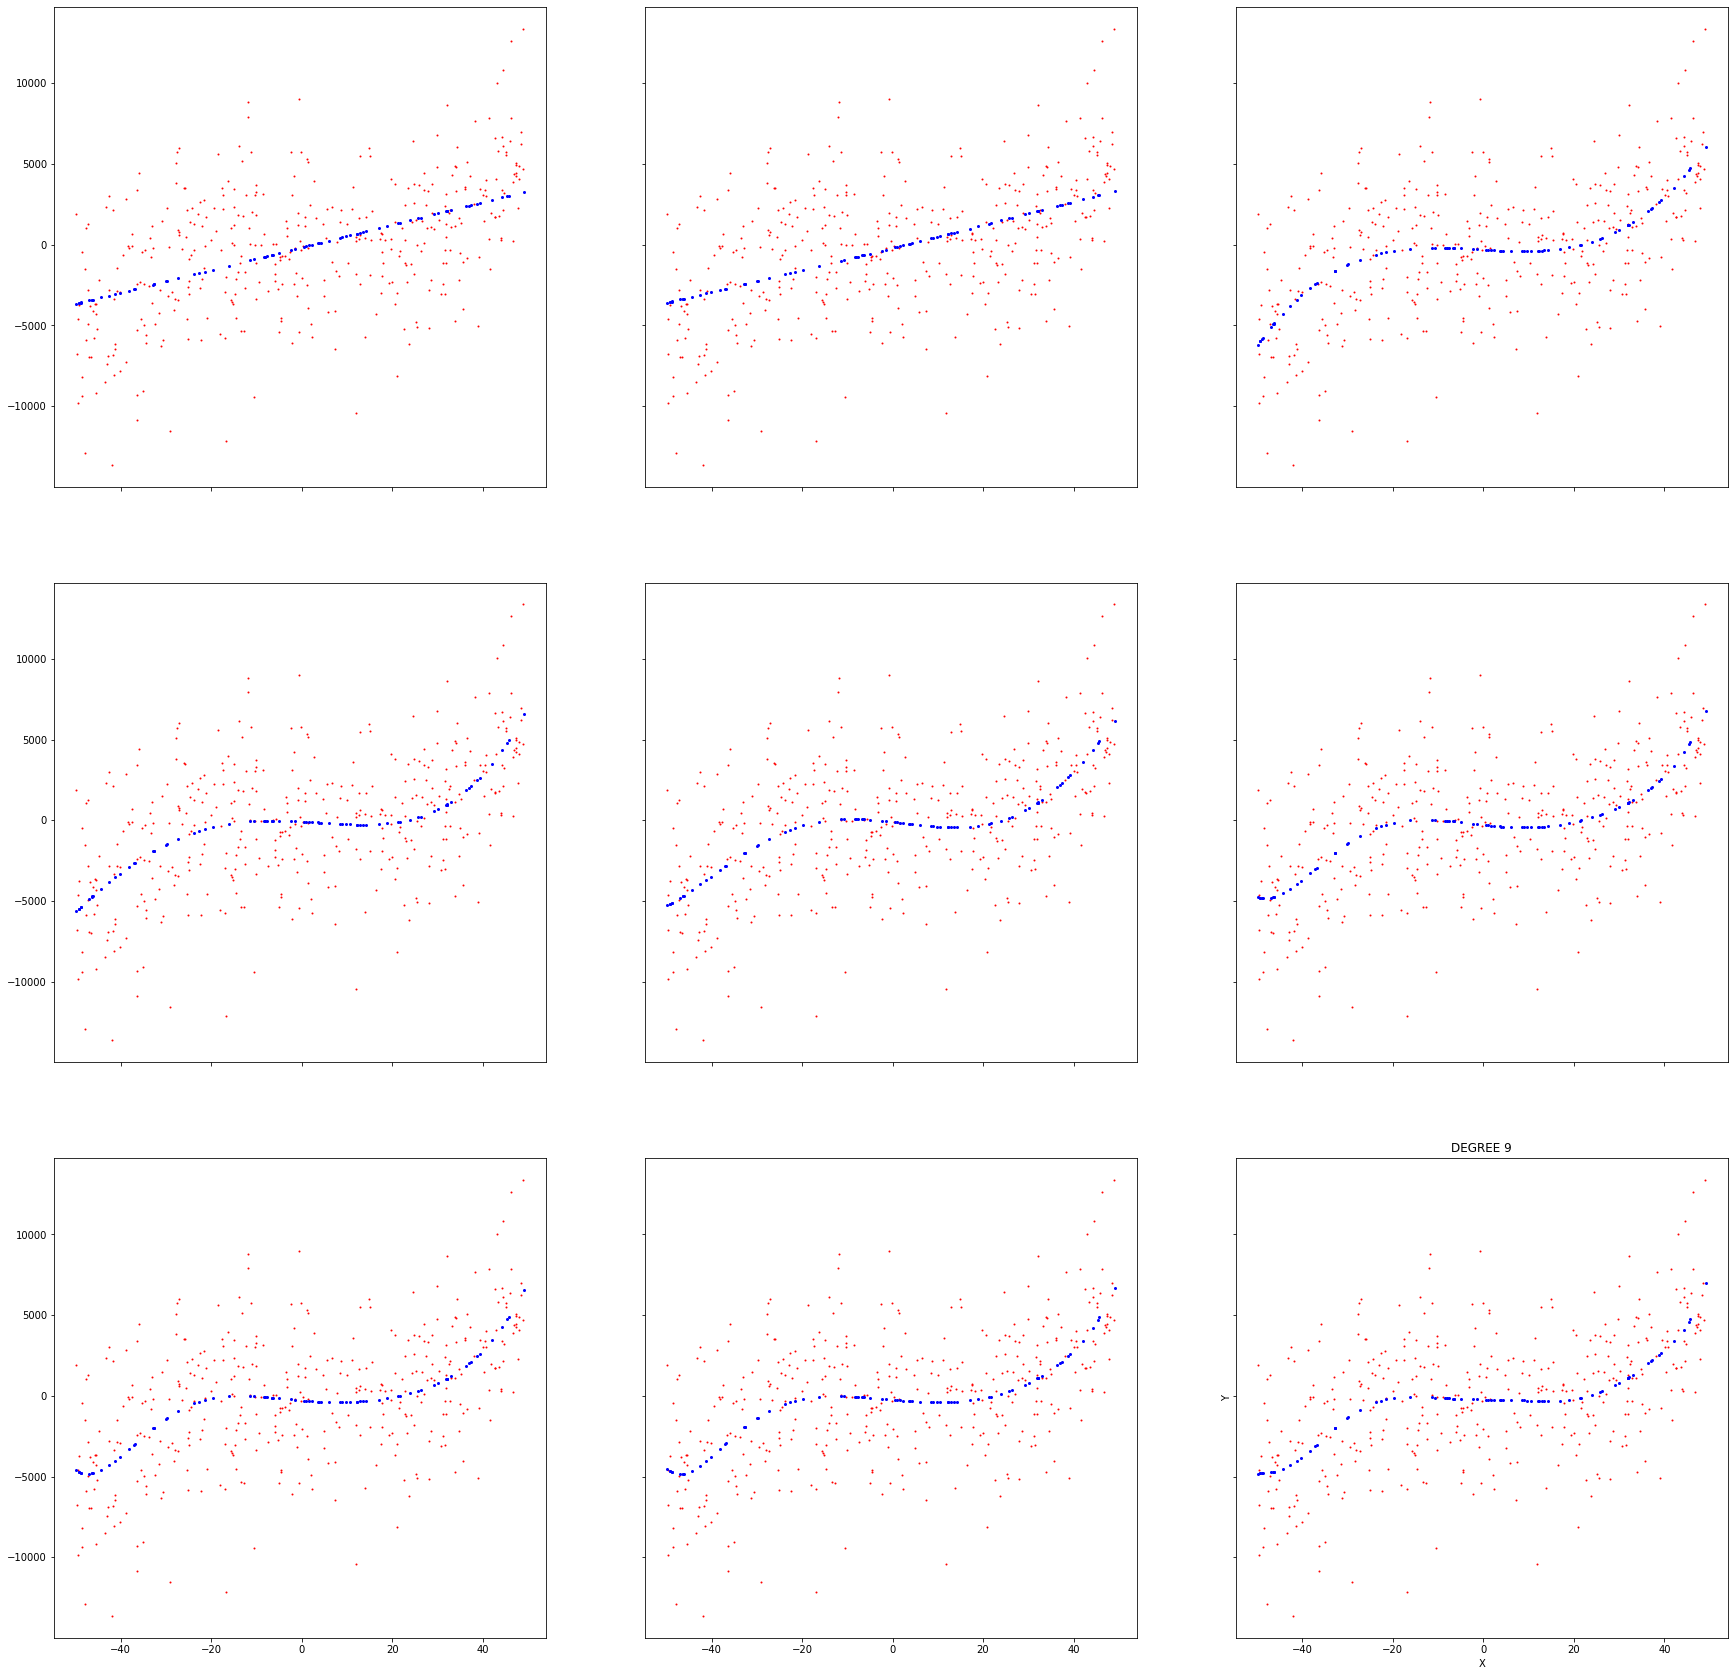

TRAINING SET  15


<Figure size 432x288 with 0 Axes>

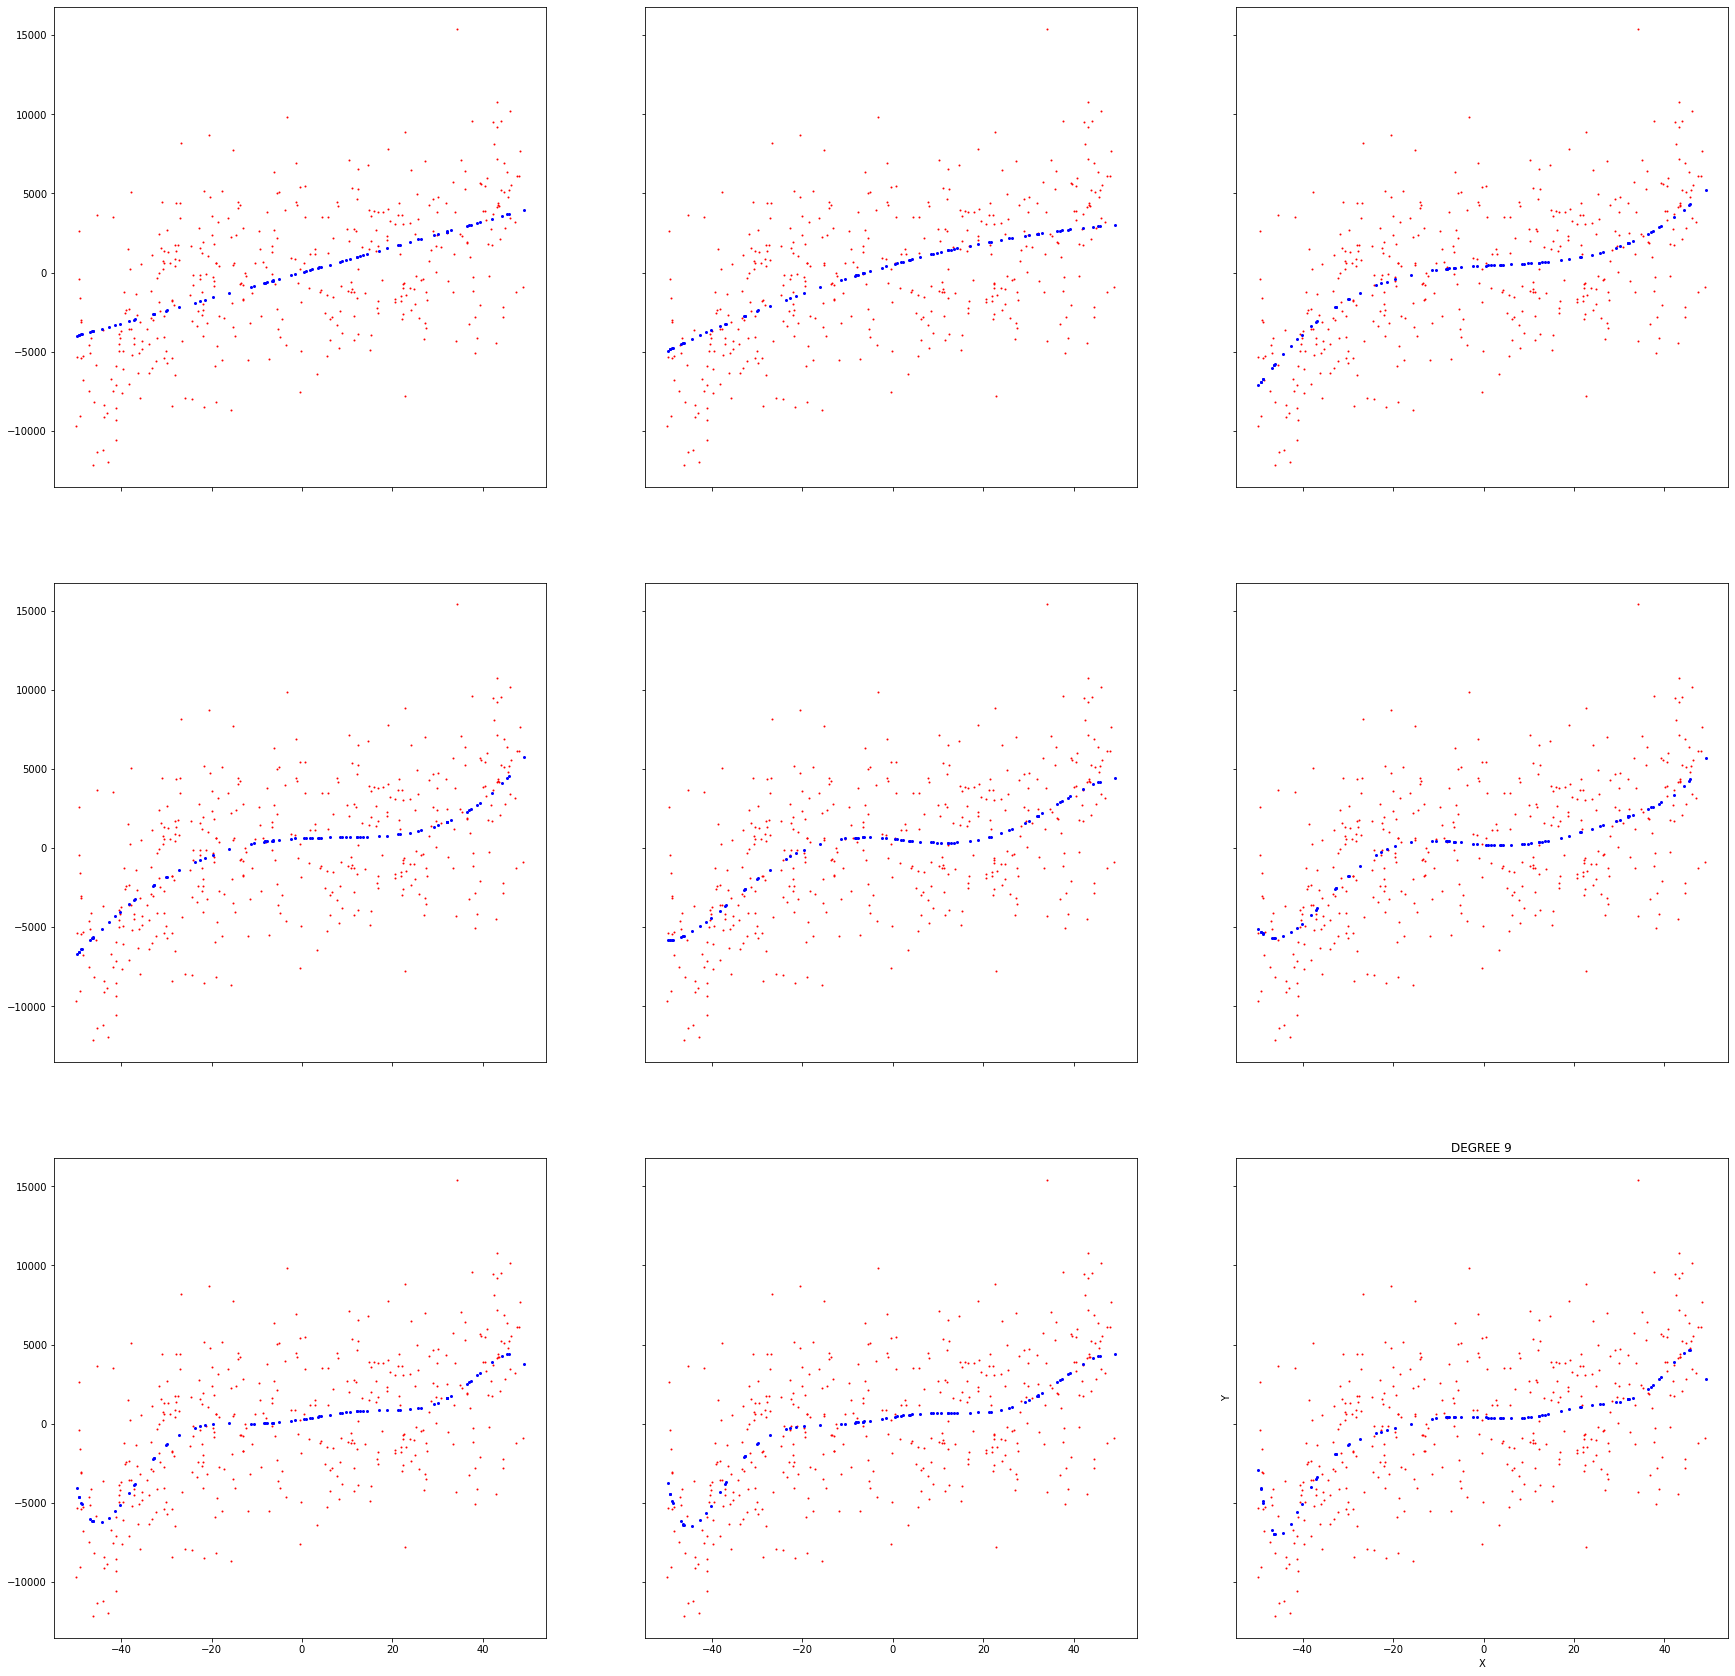

TRAINING SET  16


<Figure size 432x288 with 0 Axes>

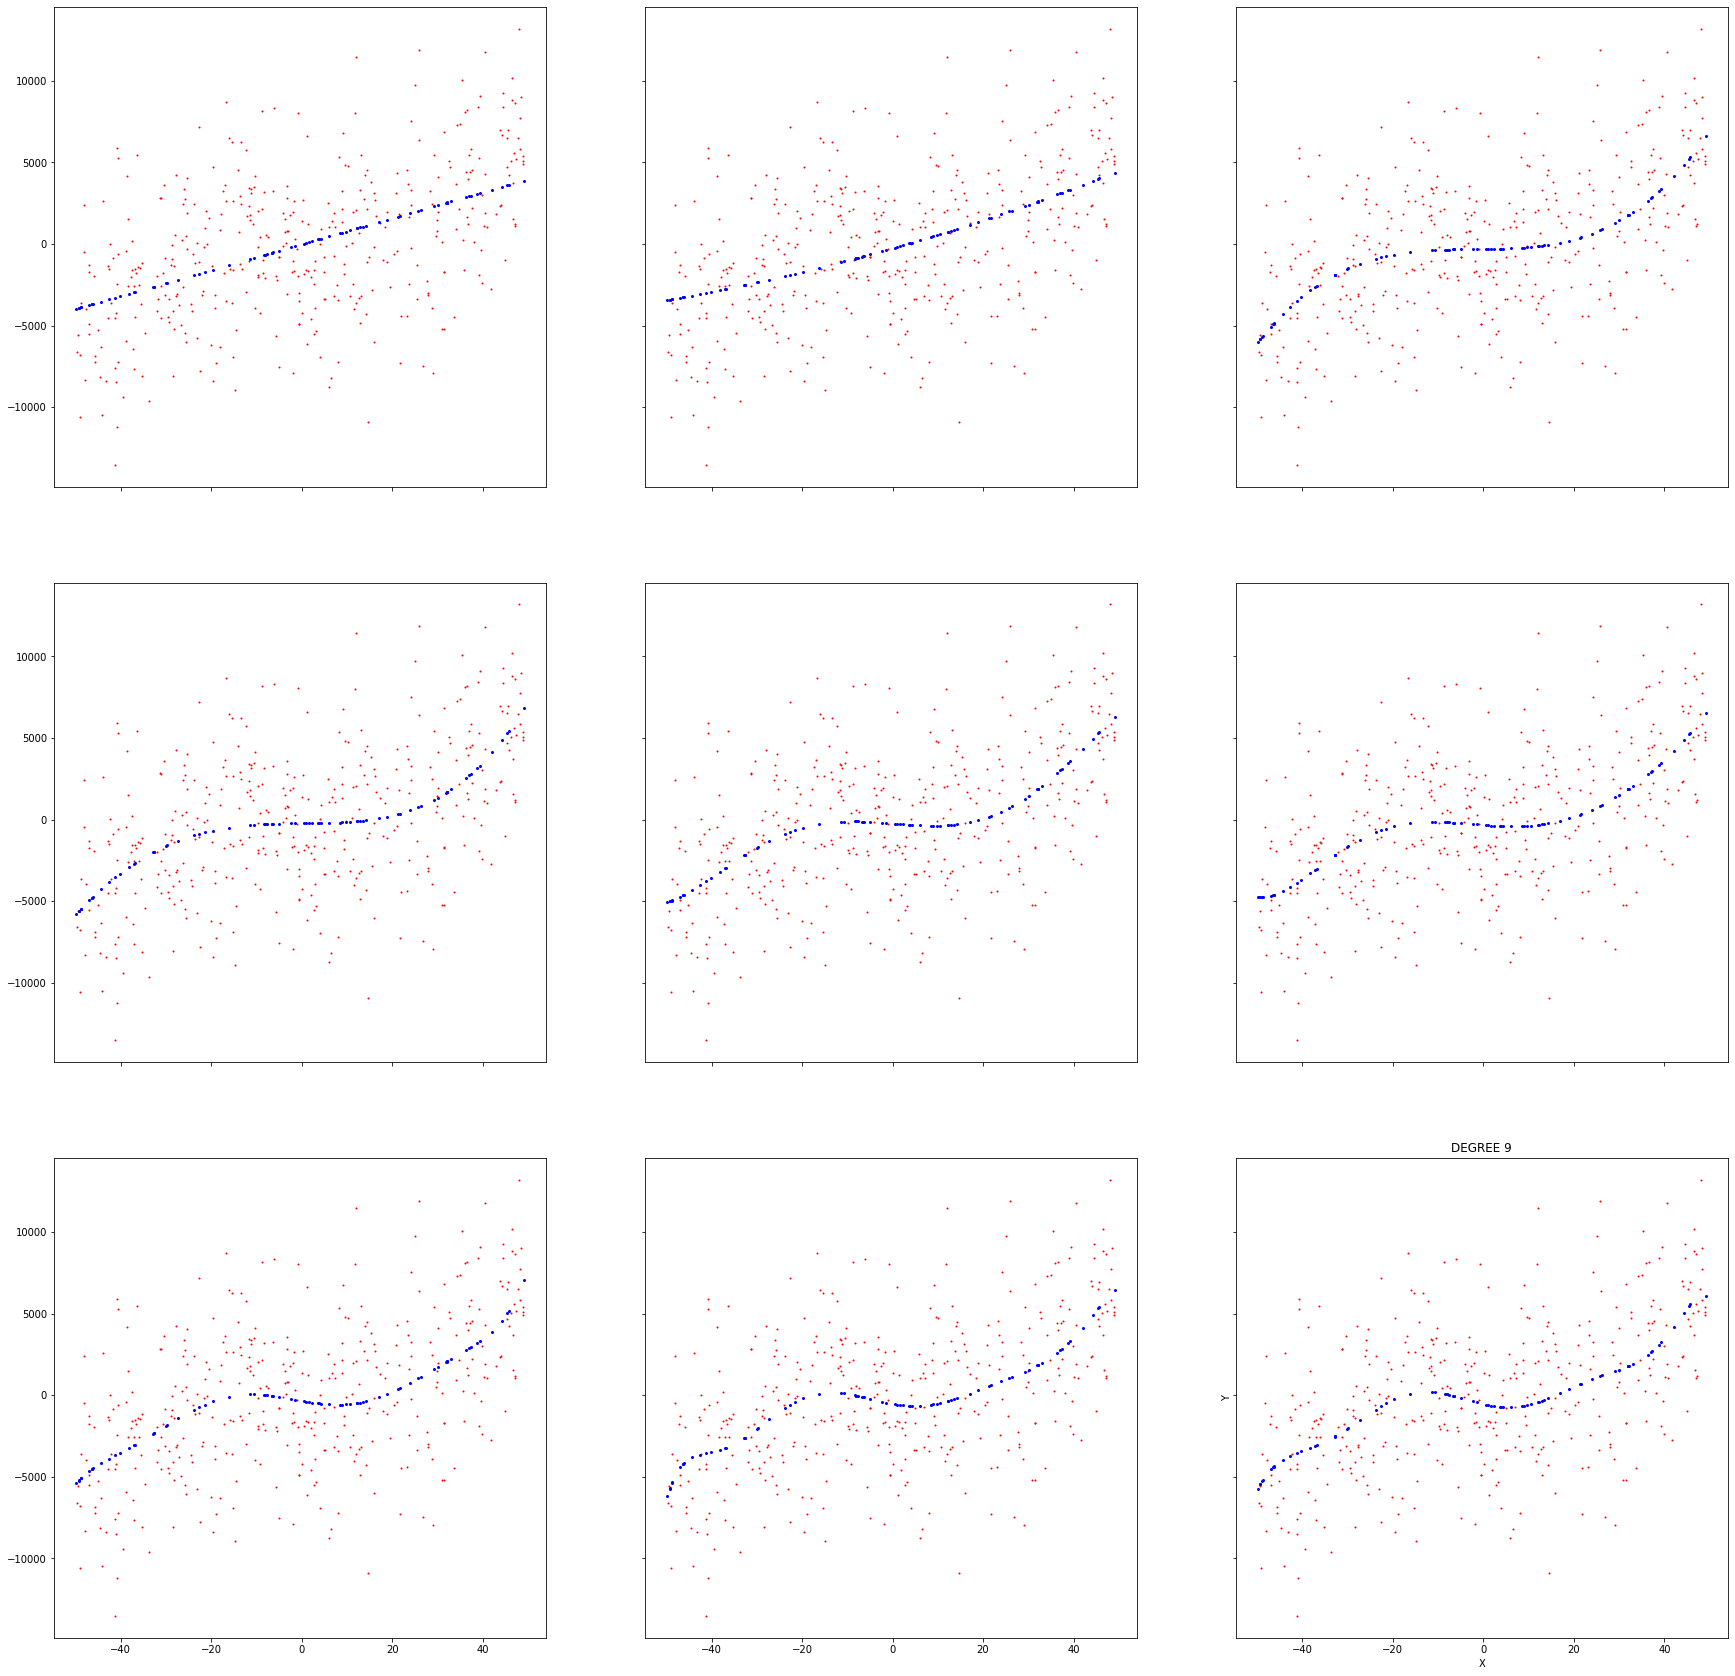

TRAINING SET  17


<Figure size 432x288 with 0 Axes>

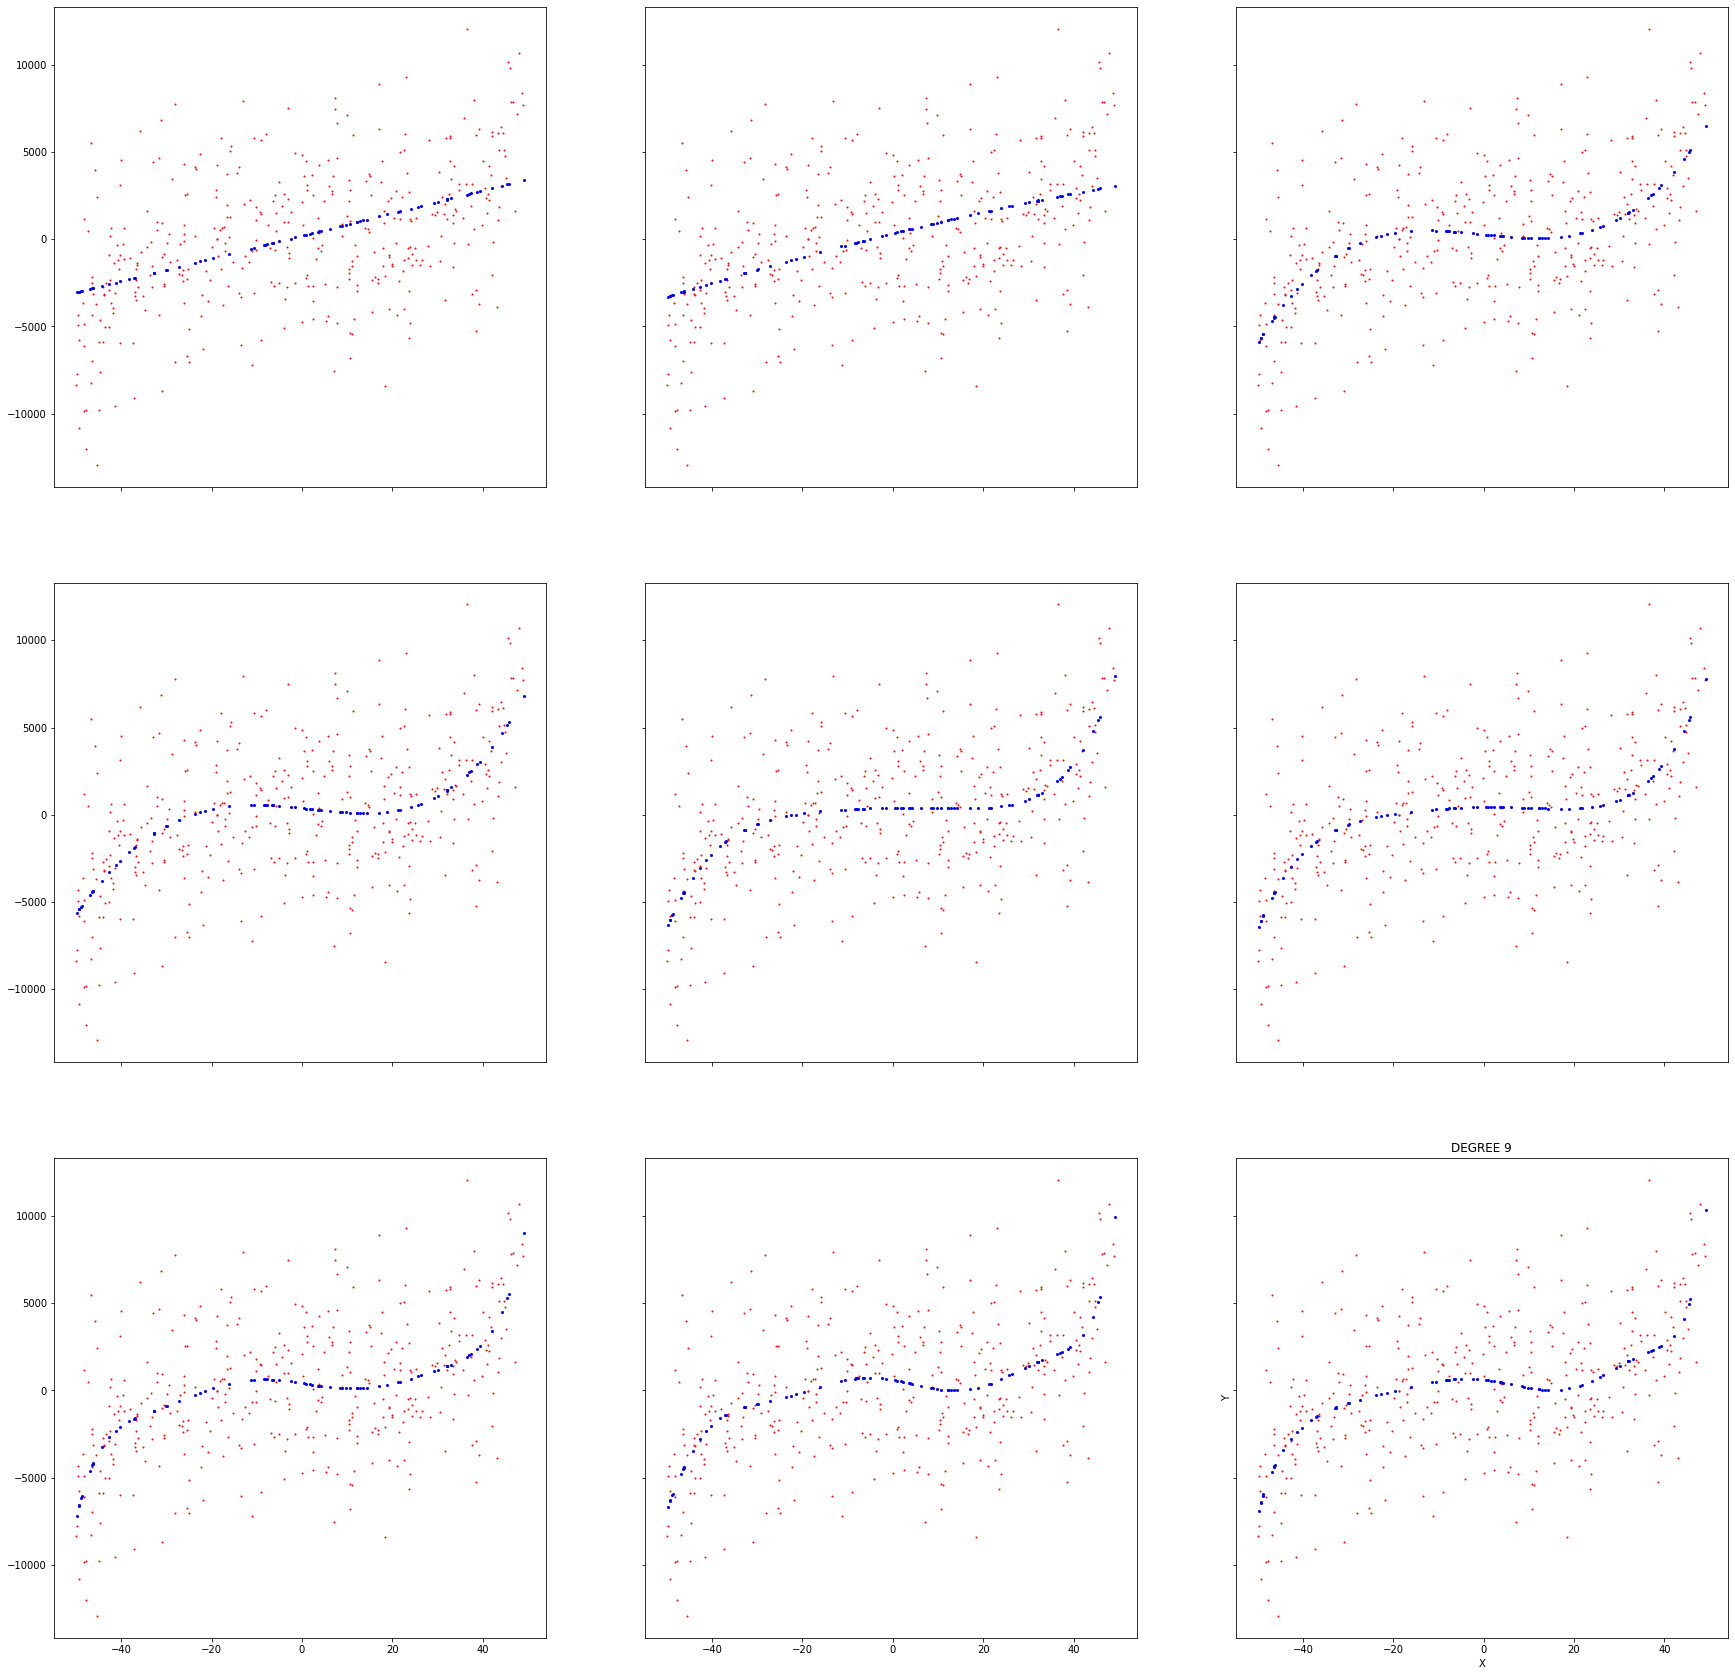

TRAINING SET  18


<Figure size 432x288 with 0 Axes>

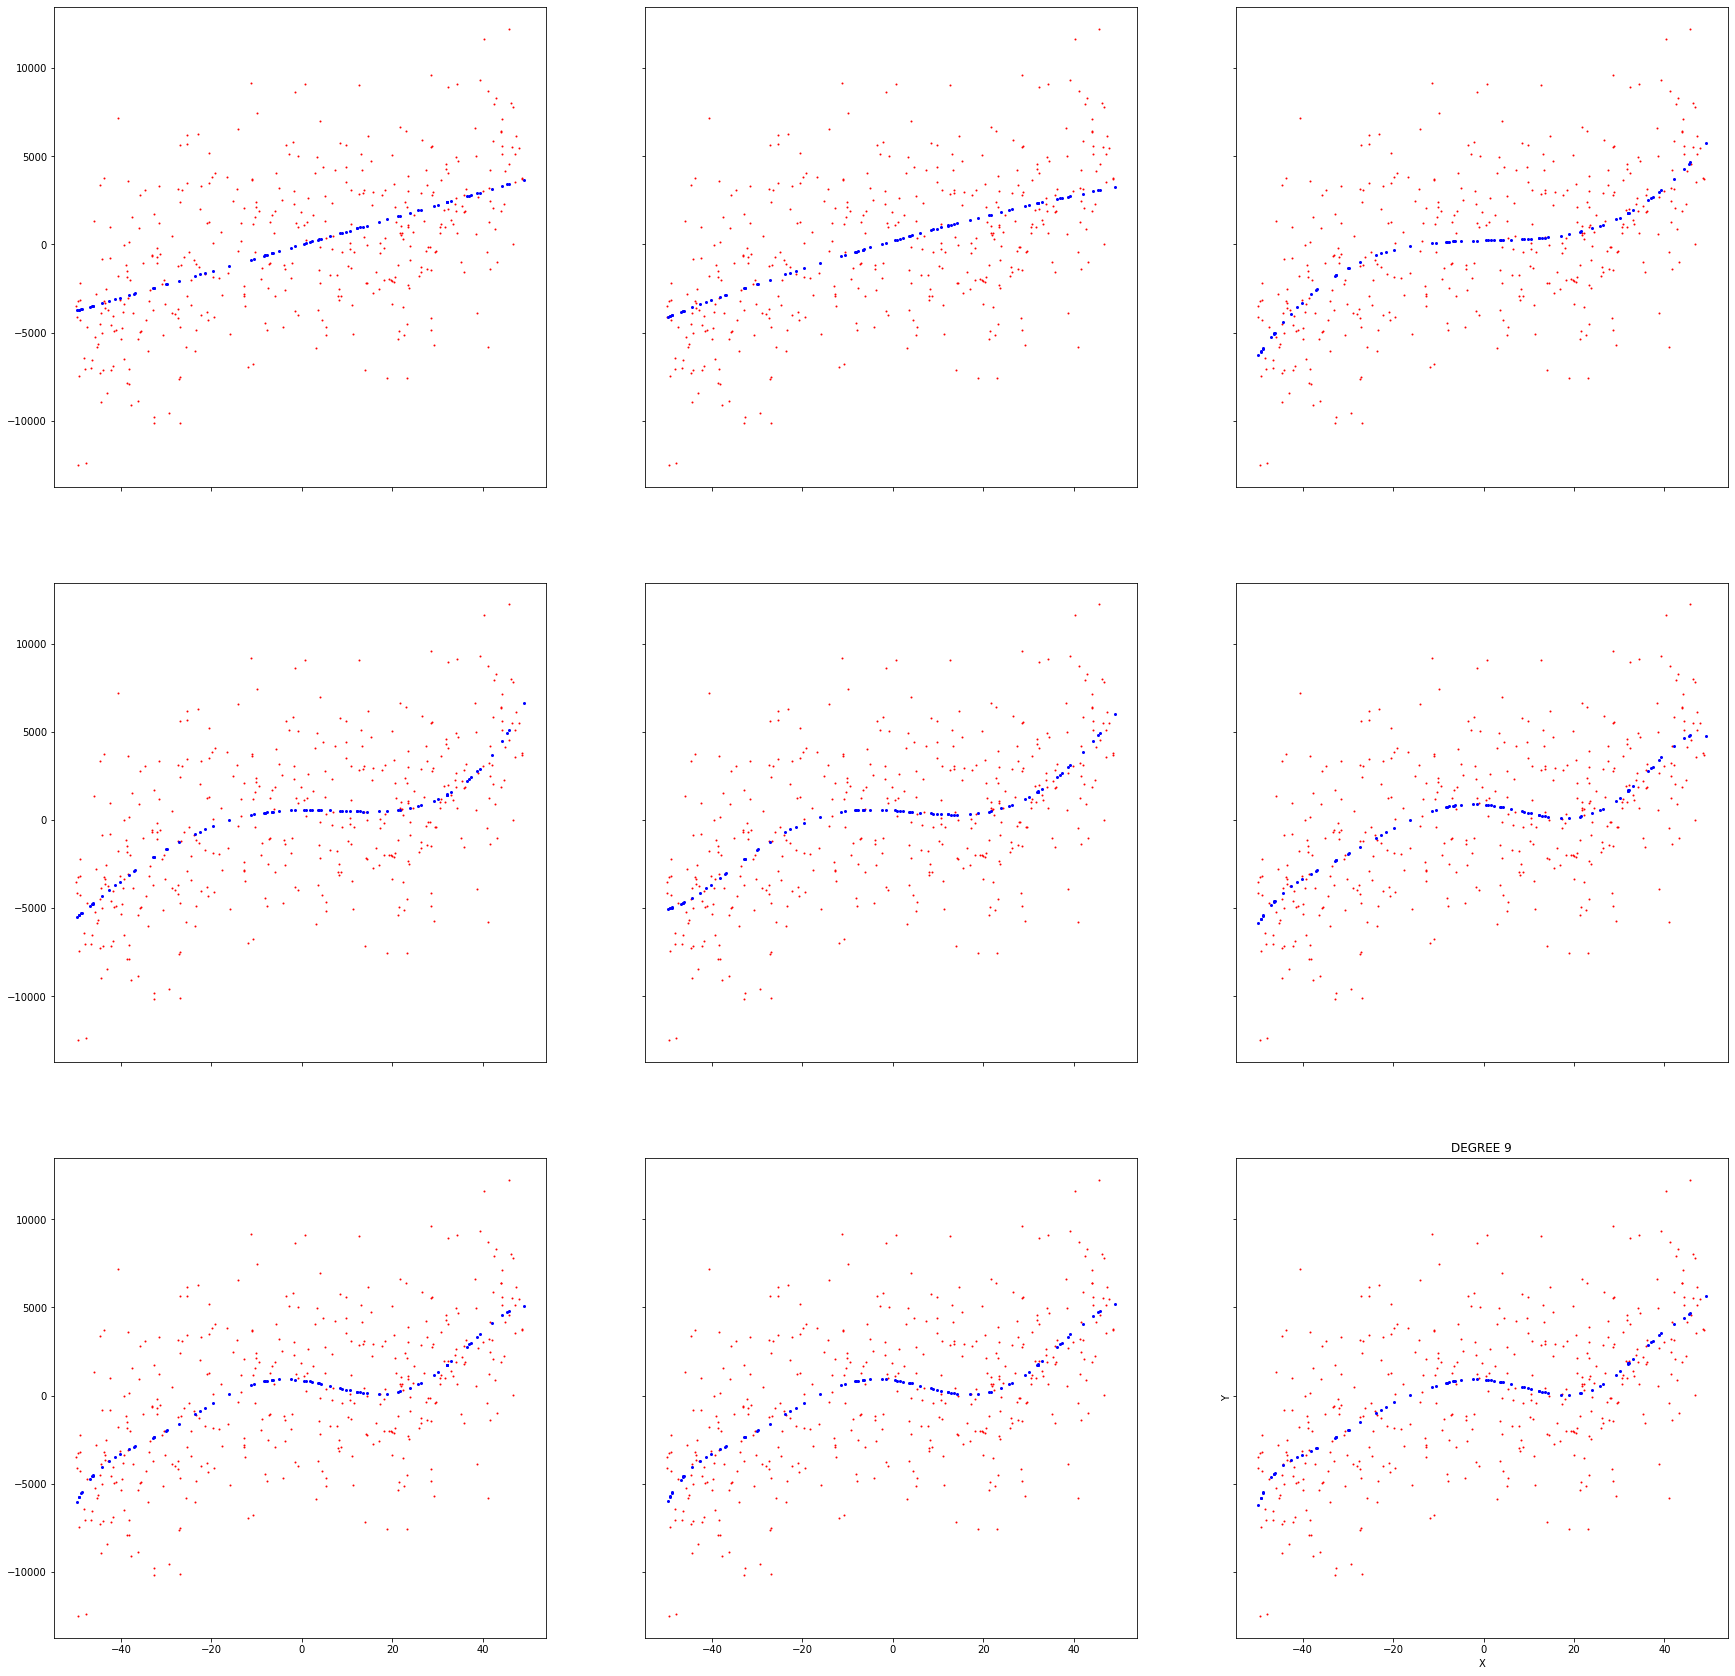

TRAINING SET  19


<Figure size 432x288 with 0 Axes>

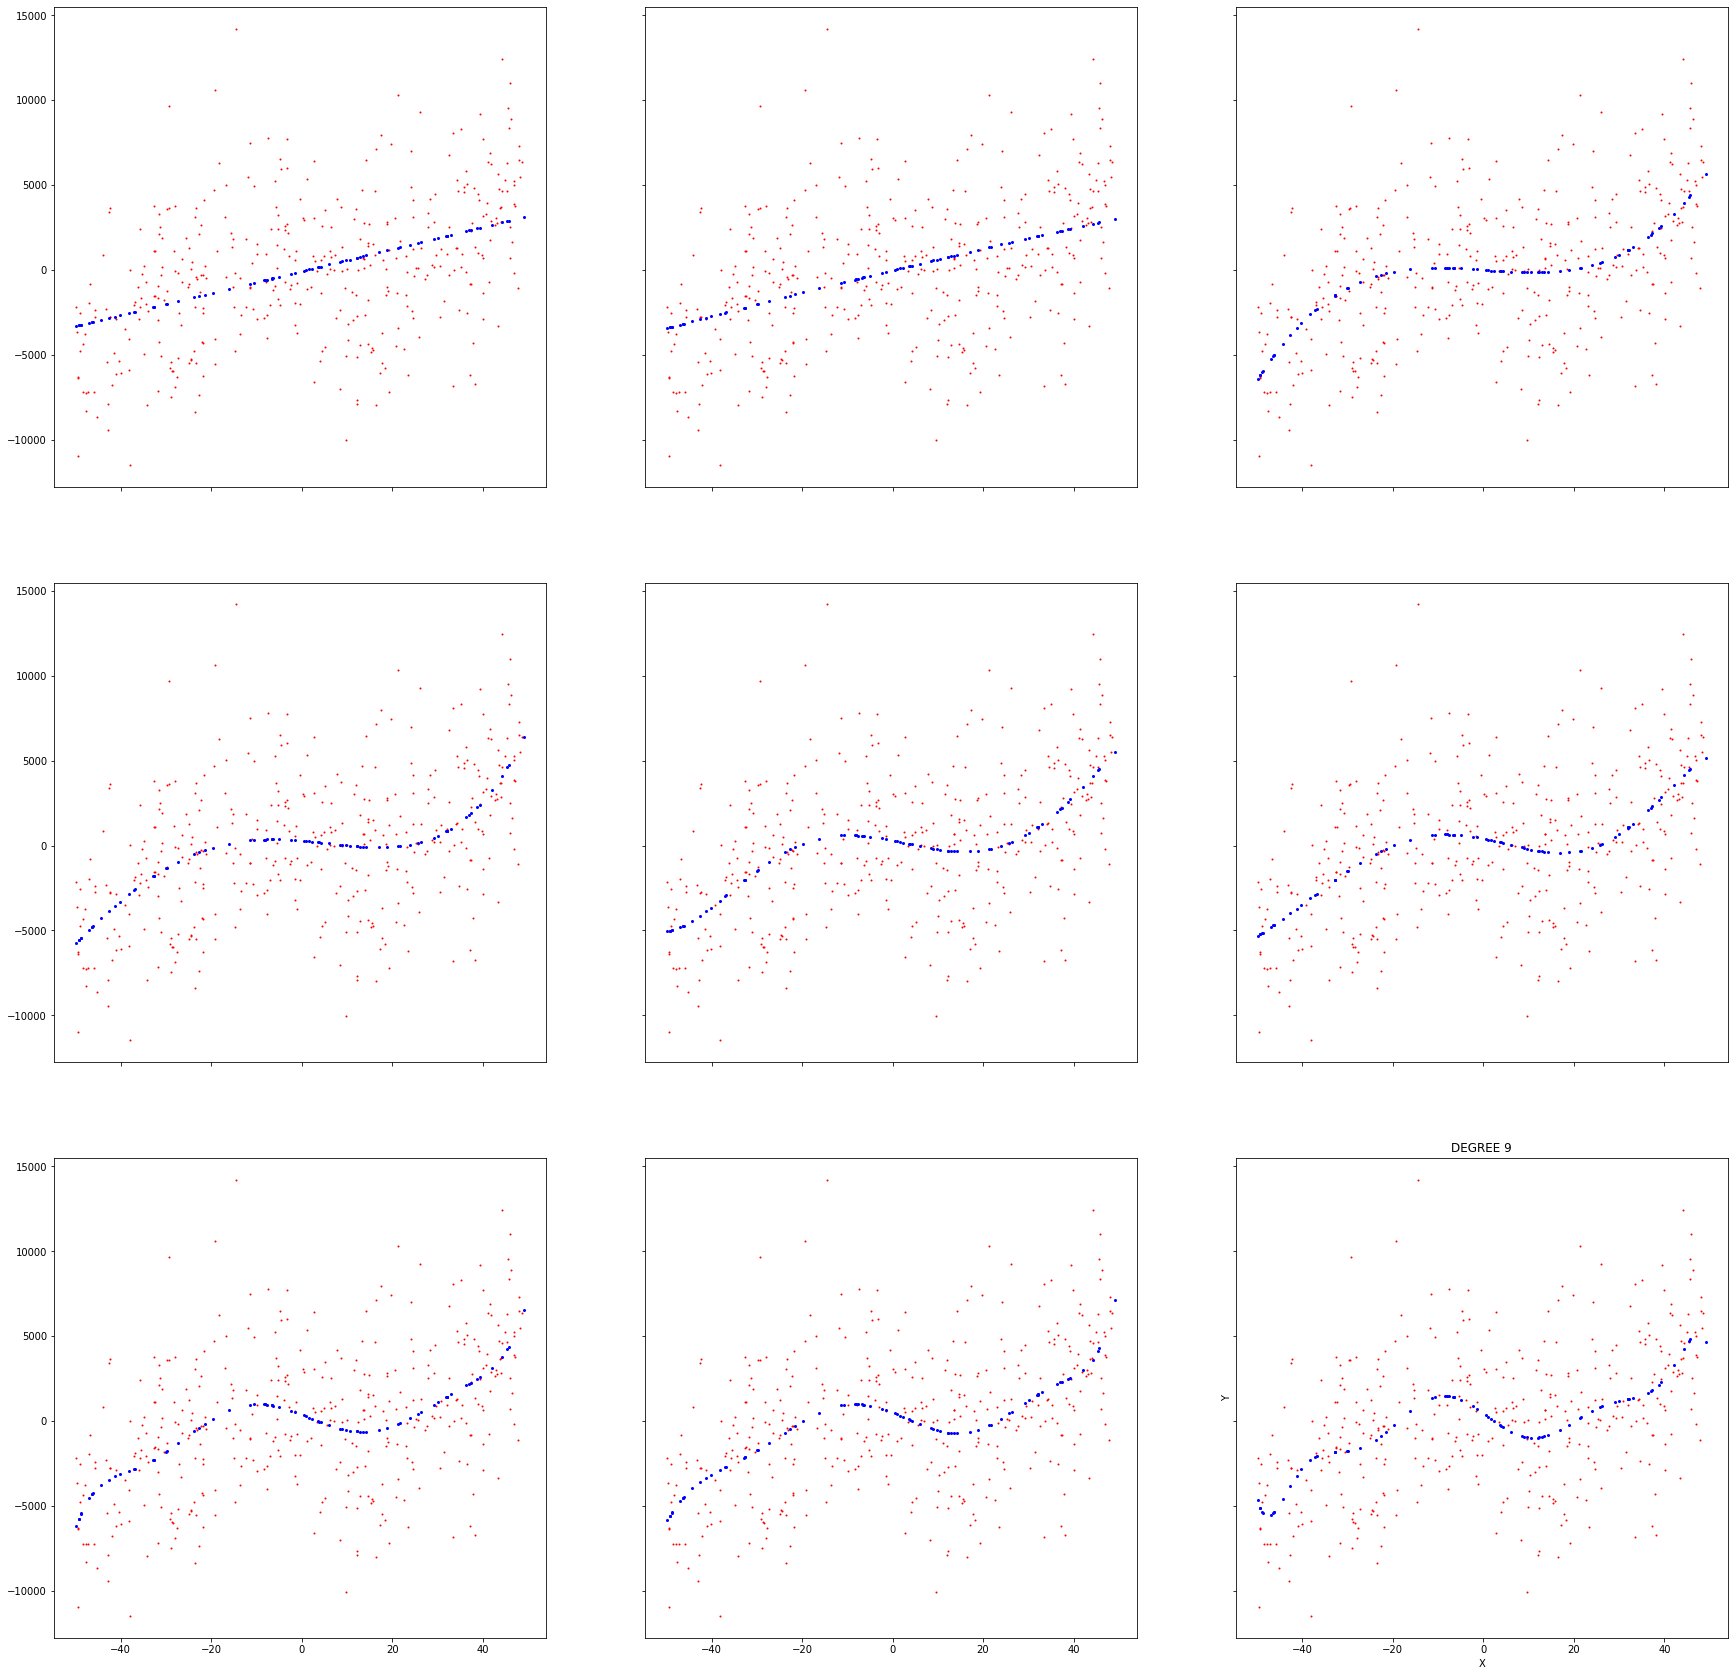

In [20]:
if(graphing == 1):
    for i in range(20):
        print("TRAINING SET ", i)
        f = plt.figure()
        f, axes = plt.subplots(nrows=3, ncols=3, sharex=True,
                               sharey=True, figsize=(30, 30))
        x = X_train_data_sets[i][:, numpy.newaxis]  # transposing it
        y = Y_train_data_sets[i]
        for degree in range(0, 9):
            axes[int(degree/3)][int(degree % 3)].plot(x, y, 'r.', markersize=2)
            
            #TODO: make PolynomialFeatures, fit them, make linear regression model, train it, 
            #      and finally infer using that model 
            poly_fratures = PolynomialFeatures(degree=degree+1)
            X_train_poly=poly_fratures.fit_transform(x)
            poly_model= LinearRegression()
            poly_model.fit(X_train_poly,Y_train_data_sets[i])
            y_test_predict=poly_model.predict(poly_fratures.fit_transform(xTest[:, numpy.newaxis]))
           
            
            axes[int(degree/3)][int(degree % 3)].plot(xTest[:, numpy.newaxis], y_test_predict, 'b.', markersize=4)
            plt.title("DEGREE "+str(degree+1))
            plt.xlabel("X")
            plt.ylabel("Y")
        plt.show()

# STEP 4: CALCULATE THE BIAS AND VARIANCE OF THE MODEL

# Get the list of all the predicted values

In [21]:
'''
First we get the list of all the y predicted values for all the models and for all the degrees separately in a 2-D array.
Here, for each model of each degree, we get the predicted y values for the given test datasets.
The values are stored as follows: y[train_data_set_no][degree]
'''
y_predicted = []
for i in range(20):
    x = X_train_data_sets[i][:, numpy.newaxis]  # transposing it
    y = Y_train_data_sets[i]
    temp = []
    for degree in range(0, 9):

        #TODO: make PolynomialFeatures, fit them, make linear regression model, train it, 
        #      and finally infer using that model 
        poly_fratures = PolynomialFeatures(degree=degree+1)
        X_train_poly=poly_fratures.fit_transform(x)
        poly_model= LinearRegression()
        poly_model.fit(X_train_poly,Y_train_data_sets[i])
        y_test_predict=poly_model.predict(poly_fratures.fit_transform(xTest[:, numpy.newaxis]))
        temp.append(y_test_predict)
    y_predicted.append(temp)

# Function for calculating the bias and the variance

In [22]:
'''
Then we calculate the bias and variance as follows:
- For a given degree we append the values of the y_predicted for each model to a list
- Convert this list to a numpy array y_predicted_part
- Calculate the bias of this list by subtracting the mean of the model from the testing dataset
- Bias corresponding to the models of a given degree is the mean of this list
- Similarly calculate the variance of this list
- Variance corresponding to the models of a given degree is the mean of this list
'''


def find_bias_variance(order):
    y_predicted_part = []
    for i in range(20):
        y_predicted_part.append(y_predicted[i][order])
    y_predicted_part = numpy.asarray(y_predicted_part)
    
    #TODO: Find the bias and the variance
    variance=numpy.var(y_predicted_part,axis=0)
    bias=numpy.mean(numpy.abs(y_predicted_part-yTest),axis=0)
    return(numpy.mean(bias), numpy.mean(variance))


# Then we call the function as follows, in order to populate the lists, bias and variance.

In [23]:
bias = []
variance = []
for i in range(9):
    b, v = find_bias_variance(i)
    bias.append(b)
    variance.append(v)
print("Bias:", bias)
print("Variance:", variance)


Bias: [838.4178012324819, 841.9833750767832, 302.02387788870607, 355.33643478270903, 398.4666922584685, 432.478290258235, 454.8078847078303, 478.4244364665163, 496.7986430364167]
Variance: [70545.48914575041, 125870.85554877373, 150073.73954647884, 212235.7083255007, 276388.48018366384, 316863.497735502, 357511.1034778219, 404289.1747652752, 459113.9355044089]


In [24]:
# The lists, bias and variance, now contain the bias and variance corresponding to a particular degree.

# Tabulate the values

# We use the pandas library in order to display the required items in a table format
final_table = dict()
final_table["DEGREE"] = range(1, 10)
final_table["BIAS"] = bias
final_table["BIAS^2"] = list(numpy.array(bias)**2)
final_table["VARIANCE"] = variance
final_table["MSE"] = list(numpy.array(
    final_table["BIAS^2"])+numpy.array(variance))
df = pandas.DataFrame(final_table)
print(df)


   DEGREE        BIAS         BIAS^2       VARIANCE            MSE
0       1  838.417801  702944.409424   70545.489146  773489.898569
1       2  841.983375  708936.003906  125870.855549  834806.859454
2       3  302.023878   91218.422815  150073.739546  241292.162361
3       4  355.336435  126263.981884  212235.708326  338499.690210
4       5  398.466692  158775.704839  276388.480184  435164.185023
5       6  432.478290  187037.471545  316863.497736  503900.969280
6       7  454.807885  206850.211992  357511.103478  564361.315470
7       8  478.424436  228889.941408  404289.174765  633179.116174
8       9  496.798643  246808.891723  459113.935504  705922.827227


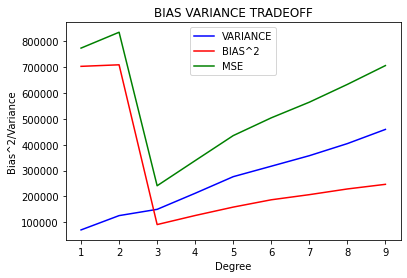

In [25]:
# Plot the bias-variance tradeoff
plt.plot(final_table["DEGREE"], final_table["VARIANCE"], color="blue")
plt.plot(final_table["DEGREE"], final_table["BIAS^2"], color="red")
plt.plot(final_table["DEGREE"], final_table["MSE"], color="green")
plt.title("BIAS VARIANCE TRADEOFF")
plt.xlabel("Degree")
plt.ylabel("Bias^2/Variance")
plt.legend(["VARIANCE", "BIAS^2", "MSE"])
plt.show()


In [26]:
print("the best model is at order 3 ")
print("greater than order 3 overfitting is happened ")
print("less than order 3 underfitting is happened ")

the best model is at order 3 
greater than order 3 overfitting is happened 
less than order 3 underfitting is happened 
